In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from os.path import join, isfile
from os import path, scandir, listdir

from source.aggregated_stats import process_details, full_stats
import source.explore as exp

pd.set_option("max_columns", 300)

In [2]:
def list_all_files(location='../input/', pattern=None, recursive=True):
    """
    This function returns a list of files at a given location (including subfolders)
    
    - location: path to the directory to be searched
    - pattern: part of the file name to be searched (ex. pattern='.csv' would return all the csv files)
    - recursive: boolean, if True the function calls itself for every subdirectory it finds
    """
    subdirectories= [f.path for f in scandir(location) if f.is_dir()]
    files = [join(location, f) for f in listdir(location) if isfile(join(location, f))]
    if recursive:
        for directory in subdirectories:
            files.extend(list_all_files(directory))
    if pattern:
        files = [f for f in files if pattern in f]
    return files

In [3]:
men_comp = list_all_files('data/raw_men/')

In [4]:
men_comp

['data/raw_men/MEvents2019.csv',
 'data/raw_men/MEvents2018.csv',
 'data/raw_men/MEvents2020.csv',
 'data/raw_men/MEvents2017.csv',
 'data/raw_men/MSampleSubmissionStage1_2020.csv',
 'data/raw_men/MEvents2015.csv',
 'data/raw_men/MEvents2016.csv',
 'data/raw_men/MPlayers.csv',
 'data/raw_men/MDataFiles_Stage2/MConferenceTourneyGames.csv',
 'data/raw_men/MDataFiles_Stage2/MNCAATourneySeeds.csv',
 'data/raw_men/MDataFiles_Stage2/Conferences.csv',
 'data/raw_men/MDataFiles_Stage2/MNCAATourneyDetailedResults.csv',
 'data/raw_men/MDataFiles_Stage2/Cities.csv',
 'data/raw_men/MDataFiles_Stage2/MSeasons.csv',
 'data/raw_men/MDataFiles_Stage2/MNCAATourneySlots.csv',
 'data/raw_men/MDataFiles_Stage2/MTeamConferences.csv',
 'data/raw_men/MDataFiles_Stage2/MSecondaryTourneyTeams.csv',
 'data/raw_men/MDataFiles_Stage2/MGameCities.csv',
 'data/raw_men/MDataFiles_Stage2/MTeamCoaches.csv',
 'data/raw_men/MDataFiles_Stage2/MTeams.csv',
 'data/raw_men/MDataFiles_Stage2/MNCAATourneyCompactResults.csv',


# submission file

In [5]:
[col for col in men_comp if 'Submission' in col]

['data/raw_men/MSampleSubmissionStage1_2020.csv']

In [6]:
df = pd.read_csv('data/raw_men/MSampleSubmissionStage1_2020.csv')
df[['year', 'Team_1', 'Team_2']] = pd.DataFrame(df['ID'].str.split('_').values.tolist(), index=df.index)
df['year'] = pd.to_numeric(df.year)
df.head()

ID  Pred  year Team_1 Team_2
0  2015_1107_1112   0.5  2015   1107   1112
1  2015_1107_1116   0.5  2015   1107   1116
2  2015_1107_1124   0.5  2015   1107   1124
3  2015_1107_1125   0.5  2015   1107   1125
4  2015_1107_1129   0.5  2015   1107   1129

In [7]:
df.year.value_counts(dropna=False)

2015    2278
2019    2278
2018    2278
2017    2278
2016    2278
Name: year, dtype: int64

# Teams.csv

In [8]:
[file for file in men_comp if 'Teams.csv' in file]

['data/raw_men/MDataFiles_Stage2/MSecondaryTourneyTeams.csv',
 'data/raw_men/MDataFiles_Stage2/MTeams.csv',
 'data/raw_men/MDataFiles_Stage1/MSecondaryTourneyTeams.csv',
 'data/raw_men/MDataFiles_Stage1/MTeams.csv']

In [9]:
df = pd.read_csv('data/raw_men/MDataFiles_Stage2/MTeams.csv')
print(df.shape)
df.head()

(367, 4)


TeamID     TeamName  FirstD1Season  LastD1Season
0    1101  Abilene Chr           2014          2020
1    1102    Air Force           1985          2020
2    1103        Akron           1985          2020
3    1104      Alabama           1985          2020
4    1105  Alabama A&M           2000          2020

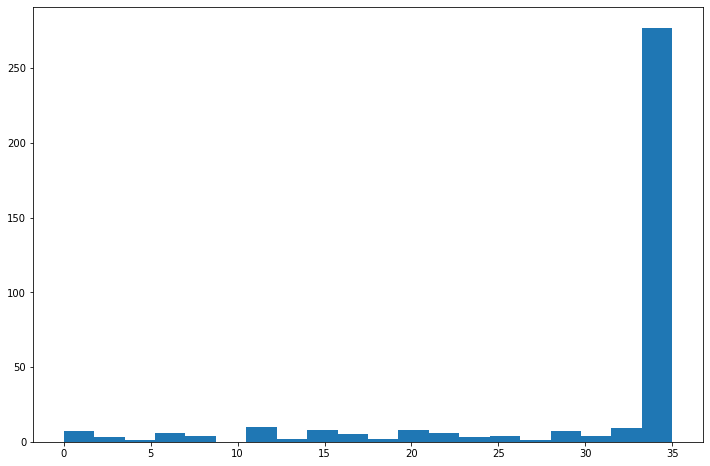

In [10]:
df['years_in_d1'] = df['LastD1Season'] - df['FirstD1Season']

df['years_in_d1'].hist(bins=20, figsize=(12,8))
plt.grid(False)

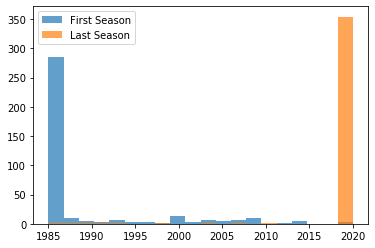

In [11]:
df.FirstD1Season.hist(bins=20, alpha=0.7, label='First Season')
df.LastD1Season.hist(bins=20, alpha=0.7, label='Last Season')
plt.grid(False)
plt.legend()

In [12]:
yr_count = pd.DataFrame({'year': np.arange(1985, 2021)})

for year in yr_count.year:
    df['is_in'] = 0
    df.loc[(df.FirstD1Season <= year) & (df.LastD1Season >= year), 'is_in'] = 1
    tot_teams = df.is_in.sum()
    yr_count.loc[yr_count.year == year, 'n_teams'] = tot_teams

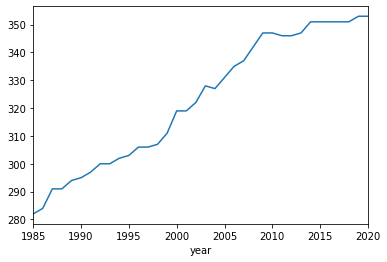

In [13]:
yr_count = yr_count.set_index('year')
yr_count.n_teams.plot()

In [14]:
df = pd.read_csv('data/raw_men/MDataFiles_Stage2/MSecondaryTourneyTeams.csv')
print(df.shape)
df.head()

(1642, 3)


Season SecondaryTourney  TeamID
0    1985              NIT    1108
1    1985              NIT    1133
2    1985              NIT    1139
3    1985              NIT    1145
4    1985              NIT    1151

In [15]:
df.SecondaryTourney.value_counts()

NIT    1160
CIT     282
CBI     192
V16       8
Name: SecondaryTourney, dtype: int64

# Seasons.csv

In [16]:
[file for file in men_comp if 'Seasons.csv' in file]

['data/raw_men/MDataFiles_Stage2/MSeasons.csv',
 'data/raw_men/MDataFiles_Stage1/MSeasons.csv']

In [17]:
df = pd.read_csv('data/raw_men/MDataFiles_Stage2/MSeasons.csv')
print(df.shape)
df.head()

(36, 6)


Season     DayZero RegionW    RegionX    RegionY    RegionZ
0    1985  10/29/1984    East       West    Midwest  Southeast
1    1986  10/28/1985    East    Midwest  Southeast       West
2    1987  10/27/1986    East  Southeast    Midwest       West
3    1988   11/2/1987    East    Midwest  Southeast       West
4    1989  10/31/1988    East       West    Midwest  Southeast

In [18]:
df.RegionW.value_counts()

East           32
Atlanta         2
Albuquerque     1
NA1             1
Name: RegionW, dtype: int64

In [19]:
df.RegionX.value_counts()

Midwest      11
West          9
South         8
Southeast     4
Phoenix       1
Chicago       1
Oakland       1
NA2           1
Name: RegionX, dtype: int64

In [20]:
df.RegionY.value_counts()

Midwest           20
South              6
Southeast          6
EastRutherford     1
Austin             1
NA3                1
Minneapolis        1
Name: RegionY, dtype: int64

In [21]:
df.RegionZ.value_counts()

West            23
South            4
Southeast        4
Syracuse         1
StLouis          1
NA4              1
Southwest        1
WashingtonDC     1
Name: RegionZ, dtype: int64

# Regular season compact results

In [22]:
[file for file in men_comp if 'RegularSeasonCompact' in file]

['data/raw_men/MDataFiles_Stage2/MRegularSeasonCompactResults.csv',
 'data/raw_men/MDataFiles_Stage1/MRegularSeasonCompactResults.csv']

In [23]:
df = pd.read_csv('data/raw_men/MDataFiles_Stage2/MRegularSeasonCompactResults.csv')
print(df.shape)
df.head()

(166880, 8)


Season  DayNum  WTeamID  WScore  LTeamID  LScore WLoc  NumOT
0    1985      20     1228      81     1328      64    N      0
1    1985      25     1106      77     1354      70    H      0
2    1985      25     1112      63     1223      56    H      0
3    1985      25     1165      70     1432      54    H      0
4    1985      25     1192      86     1447      74    H      0

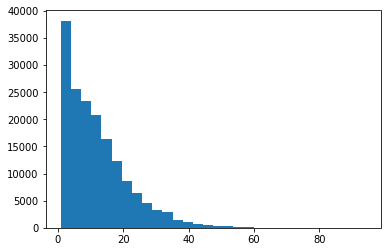

In [24]:
df['point_diff'] = df.WScore - df.LScore
df.point_diff.hist(bins=30)
plt.grid(False)

In [25]:
df.describe()

Season         DayNum        WTeamID         WScore  \
count  166880.000000  166880.000000  166880.000000  166880.000000   
mean     2003.764190      74.397172    1286.945620      76.775401   
std        10.326664      33.824524     104.553584      12.021207   
min      1985.000000       0.000000    1101.000000      34.000000   
25%      1995.000000      47.000000    1198.000000      69.000000   
50%      2005.000000      77.000000    1284.000000      76.000000   
75%      2013.000000     103.000000    1380.000000      84.000000   
max      2020.000000     132.000000    1467.000000     186.000000   

             LTeamID         LScore          NumOT     point_diff  
count  166880.000000  166880.000000  166880.000000  166880.000000  
mean     1282.632568      64.677762       0.045841      12.097639  
std       104.721398      11.319083       0.251712       9.405719  
min      1101.000000      20.000000       0.000000       1.000000  
25%      1191.000000      57.000000       0.000000       5.000000  
50%      1280.000000      64.000000       0.000000      10.000000  
75%      1375.000000      72.000000       0.000000      17.000000  
max      1467.000000     150.000000       6.000000      94.000000

In [26]:
summaries = df[['Season', 
    'WScore', 
    'LScore', 
    'NumOT', 
    'point_diff']].groupby('Season').agg(['min', 'max', 'mean', 'median'])

summaries.columns = ['_'.join(col).strip() for col in summaries.columns.values]
summaries

WScore_min  WScore_max  WScore_mean  WScore_median  LScore_min  \
Season                                                                   
1985            37         142    74.723040             74          27   
1986            35         151    74.813640             74          30   
1987            43         133    77.993870             77          25   
1988            40         152    79.773704             79          31   
1989            43         181    81.728511             81          30   
1990            36         173    80.846477             80          28   
1991            42         186    82.733932             82          27   
1992            41         159    79.992004             79          25   
1993            40         155    79.508790             79          27   
1994            43         150    81.160345             80          33   
1995            46         156    80.096149             79          32   
1996            41         142    78.205483             77          28   
1997            42         137    76.300842             76          21   
1998            38         153    77.229902             76          31   
1999            43         132    76.043581             75          27   
2000            37         143    76.310467             76          26   
2001            35         130    77.088650             77          31   
2002            40         133    76.963557             76          23   
2003            42         142    75.795061             75          24   
2004            37         122    74.971122             75          23   
2005            37         123    74.693690             74          22   
2006            39         129    74.587555             74          21   
2007            40         129    74.829467             74          27   
2008            39         129    74.962425             74          20   
2009            38         127    74.033721             73          22   
2010            43         134    74.652480             74          30   
2011            36         121    74.374190             74          30   
2012            40         124    73.379973             73          27   
2013            34         120    72.840789             72          25   
2014            44         126    76.101268             75          25   
2015            38         126    72.680799             72          26   
2016            40         144    78.295958             78          25   
2017            43         131    78.645783             78          27   
2018            44         132    79.080296             79          31   
2019            42         139    77.887424             77          24   
2020            46         143    76.177365             76          26   

        LScore_max  LScore_mean  LScore_median  NumOT_min  NumOT_max  \
Season                                                                 
1985           140    63.860316             64          0          3   
1986           114    63.633888             63          0          2   
1987           111    66.770626             66          0          3   
1988           133    67.697092             67          0          2   
1989           150    69.530840             69          0          2   
1990           141    68.833622             68          0          3   
1991           140    70.057240             69          0          2   
1992           116    67.144657             67          0          3   
1993           112    67.301858             67          0          2   
1994           125    68.561330             68          0          3   
1995           132    67.394898             67          0          3   
1996           127    65.737506             65          0          3   
1997           111    63.742238             63          0          2   
1998           121    64.612911             64          0          2   
1999           123    63.427996            

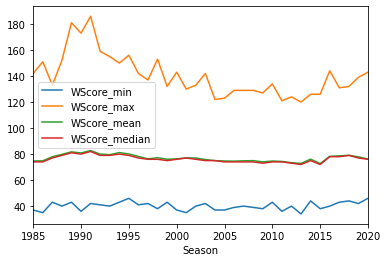

In [27]:
summaries[[col for col in summaries.columns if 'WScore' in col and 'sum' not in col]].plot()

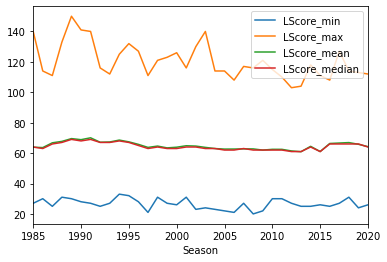

In [28]:
summaries[[col for col in summaries.columns if 'LScore' in col and 'sum' not in col]].plot()

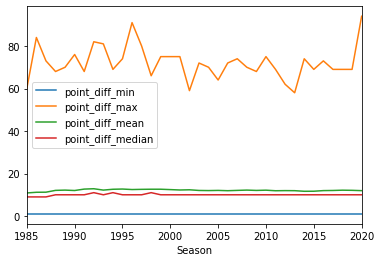

In [29]:
summaries[[col for col in summaries.columns if 'point_diff' in col and 'sum' not in col]].plot()

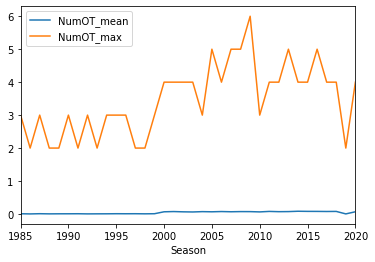

In [30]:
summaries[['NumOT_mean', 'NumOT_max']].plot()

In [31]:
summaries = df[['Season', 'WLoc',
    'WScore', 
    'LScore', 
    'NumOT', 
    'point_diff']].groupby(['Season', 'WLoc']).agg(['min', 'max', 'mean', 'median', 'count'])

summaries.columns = ['_'.join(col).strip() for col in summaries.columns.values]
summaries

WScore_min  WScore_max  WScore_mean  WScore_median  WScore_count  \
Season WLoc                                                                     
1985   A             41         142    72.491023             72          1114   
       H             37         128    75.935383             75          2244   
       N             43         121    74.105541             74           379   
1986   A             35         126    72.163964             72          1110   
       H             42         151    76.169076             76          2283   
...                 ...         ...          ...            ...           ...   
2019   H             42         139    78.884750             78          3141   
       N             50         118    76.835796             77           609   
2020   A             46         116    74.936081             74          1674   
       H             46         143    77.065773             77          3208   
       N             47         115    74.446188             74           446   

             LScore_min  LScore_max  LScore_mean  LScore_median  LScore_count  \
Season WLoc                                                                     
1985   A             35         140    63.952424           63.0          1114   
       H             27         105    63.839127           64.0          2244   
       N             37          96    63.715040           64.0           379   
1986   A             30          97    63.426126           63.0          1110   
       H             31         114    63.786684           63.0          2283   
...                 ...         ...          ...            ...           ...   
2019   H             33         113    65.209806           65.0          3141   
       N             38         107    65.816092           66.0           609   
2020   A             34         110    65.529869           65.0          1674   
       H             26         107    63.677681           63.0          3208   
       N             37         112    63.325112           63.0           446   

             NumOT_min  NumOT_max  NumOT_mean  NumOT_median  NumOT_count  \
Season WLoc                                                                
1985   A             0          3    0.007181             0         1114   
       H             0          1    0.002228             0         2244   
       N             0          3    0.042216             0          379   
1986   A             0          2    0.001802             0         1110   
       H             0          1    0.001752             0         2283   
...                ...        ...         ...           ...          ...   
2019   H             0          2    0.000955             0         3141   
       N             0          1    0.018062             0          609   
2020   A             0          3    0.082437             0         1674   
       H             0          4    0.061409             0         3208   
       N             0          3    0.051570             0          446   

             point_diff_min  point_diff_max  point_diff_mean  \
Season WLoc                                                    
1985   A                  1              43         8.538600   
       H                  1              60        12.096257   
       N                  1              47        10.390501   
1986   A                  1              53         8.737838   
       H                  1              53        12.382392   
...                     ...             ...              ...   
2019   H                  1              69        13.674944   
       N                  1              39        11.019704   
2020   A                  1              57         9.406213   
       H                  1              94        13.388092   
       N                  1              41        11.121076   

             point_diff_median  point_diff_count  
Season WLoc                     

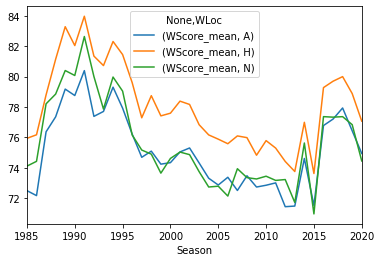

In [32]:
summaries[['WScore_mean']].unstack().plot()

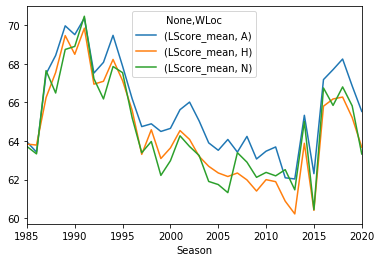

In [33]:
summaries[['LScore_mean']].unstack().plot()

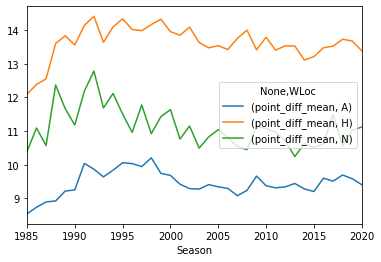

In [34]:
summaries[['point_diff_mean']].unstack().plot()

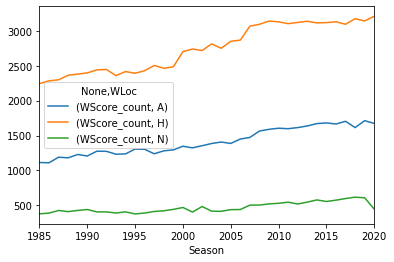

In [35]:
summaries[['WScore_count']].unstack().plot()

# Playoff compact results

In [36]:
[file for file in men_comp if 'NCAATourneyCompact' in file]

['data/raw_men/MDataFiles_Stage2/MNCAATourneyCompactResults.csv',
 'data/raw_men/MDataFiles_Stage1/MNCAATourneyCompactResults.csv']

In [37]:
df = pd.read_csv('data/raw_men/MDataFiles_Stage2/MNCAATourneyCompactResults.csv')
print(df.shape)
df.head()

(2251, 8)


Season  DayNum  WTeamID  WScore  LTeamID  LScore WLoc  NumOT
0    1985     136     1116      63     1234      54    N      0
1    1985     136     1120      59     1345      58    N      0
2    1985     136     1207      68     1250      43    N      0
3    1985     136     1229      58     1425      55    N      0
4    1985     136     1242      49     1325      38    N      0

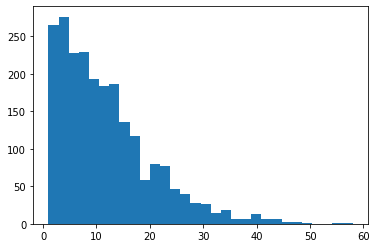

In [38]:
df['point_diff'] = df.WScore - df.LScore
df.point_diff.hist(bins=30)
plt.grid(False)

In [39]:
summaries = df[['Season', 
    'WScore', 
    'LScore', 
    'NumOT', 
    'point_diff']].groupby('Season').agg(['min', 'max', 'mean', 'median'])

summaries.columns = ['_'.join(col).strip() for col in summaries.columns.values]
summaries

WScore_min  WScore_max  WScore_mean  WScore_median  LScore_min  \
Season                                                                   
1985            46          96    68.047619           67.0          38   
1986            58         101    76.841270           74.0          43   
1987            57         113    82.603175           83.0          51   
1988            54         123    83.349206           83.0          47   
1989            50         124    85.222222           85.0          46   
1990            49         149    80.761905           78.0          46   
1991            50         117    80.079365           79.0          48   
1992            51         106    81.238095           81.0          43   
1993            54         112    81.761905           81.0          50   
1994            51         112    78.349206           77.0          39   
1995            49         113    78.222222           76.0          47   
1996            43         110    77.666667           77.0          41   
1997            55         109    77.428571           76.0          40   
1998            51         110    78.492063           79.0          46   
1999            43         108    74.666667           75.0          32   
2000            48         105    73.222222           74.0          38   
2001            50         101    77.468750           77.5          35   
2002            63         105    79.625000           80.0          37   
2003            47         108    76.562500           77.0          46   
2004            53         102    75.500000           75.5          43   
2005            55         111    75.562500           75.0          46   
2006            50          98    73.203125           73.0          44   
2007            54         121    75.703125           76.0          42   
2008            51         113    77.218750           75.5          29   
2009            58         103    77.250000           77.0          43   
2010            51         101    74.031250           73.0          44   
2011            53         102    73.194030           72.0          41   
2012            57         102    71.402985           71.0          41   
2013            54          95    72.208955           73.0          34   
2014            55          93    73.850746           75.0          35   
2015            56          94    72.925373           72.0          39   
2016            47         105    78.343284           78.0          43   
2017            60         103    79.432836           78.0          39   
2018            50         102    76.253731           76.0          43   
2019            53          99    76.358209           77.0          44   

        LScore_max  LScore_mean  LScore_median  NumOT_min  NumOT_max  \
Season                                                                 
1985            84    59.333333           58.0          0          1   
1986            87    66.142857           65.0          0          1   
1987            97    71.984127           71.0          0          1   
1988           115    71.285714           72.0          0          1   
1989           101    73.253968           73.0          0          1   
1990           115    70.761905           70.0          0          1   
1991            90    67.809524           68.0          0          1   
1992           103    68.730159           69.0          0          1   
1993            84    66.841270           68.0          0          1   
1994           102    67.238095           68.0          0          1   
1995            96    66.269841           66.0          0          3   
1996            90    63.825397           63.0          0          1   
1997            92    65.952381           66.0          0          1   
1998            87    65.968254           65.0          0          1   
1999            88    61.126984           61.0          0          1   
2000            80    61.666667           61.

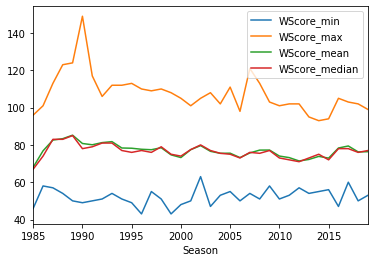

In [40]:
summaries[[col for col in summaries.columns if 'WScore' in col and 'sum' not in col]].plot()

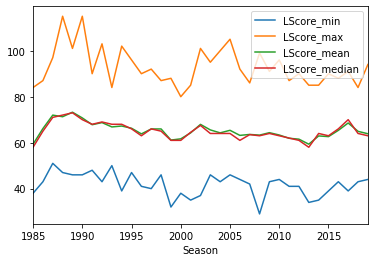

In [41]:
summaries[[col for col in summaries.columns if 'LScore' in col and 'sum' not in col]].plot()

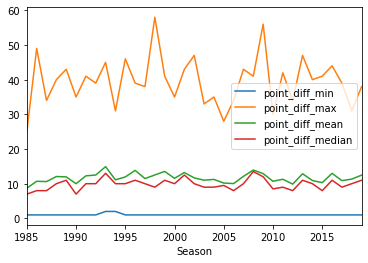

In [42]:
summaries[[col for col in summaries.columns if 'point_diff' in col and 'sum' not in col]].plot()

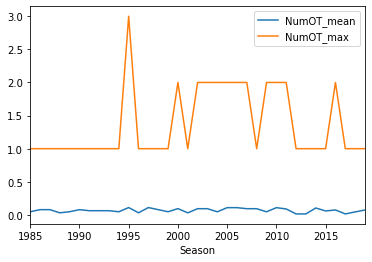

In [43]:
summaries[['NumOT_mean', 'NumOT_max']].plot()

In [44]:
df.WLoc.value_counts()

N    2251
Name: WLoc, dtype: int64

# Detailed results

In [45]:
[col for col in men_comp if 'Detailed' in col]

['data/raw_men/MDataFiles_Stage2/MNCAATourneyDetailedResults.csv',
 'data/raw_men/MDataFiles_Stage2/MRegularSeasonDetailedResults.csv',
 'data/raw_men/MDataFiles_Stage1/MNCAATourneyDetailedResults.csv',
 'data/raw_men/MDataFiles_Stage1/MRegularSeasonDetailedResults.csv']

In [46]:
reg_season = pd.read_csv('data/raw_men/MDataFiles_Stage2/MRegularSeasonDetailedResults.csv')
print(df.shape)
stats = [col for col in reg_season.columns if 'W' in col and 'ID' not in col and 'Loc' not in col]

reg_season = process_details(reg_season)

reg_season.head()

(2251, 9)


Season  DayNum  WTeamID  WScore  LTeamID  LScore WLoc  NumOT  WFGM  WFGA  \
0    2003      10     1104      68     1328      62    N      0    27    58   
1    2003      10     1272      70     1393      63    N      0    26    62   
2    2003      11     1266      73     1437      61    N      0    24    58   
3    2003      11     1296      56     1457      50    N      0    18    38   
4    2003      11     1400      77     1208      71    N      0    30    61   

   WFGM3  WFGA3  WFTM  WFTA  WOR  WDR  WAst  WTO  WStl  WBlk  WPF  LFGM  LFGA  \
0      3     14    11    18   14   24    13   23     7     1   22    22    53   
1      8     20    10    19   15   28    16   13     4     4   18    24    67   
2      8     18    17    29   17   26    15   10     5     2   25    22    73   
3      3      9    17    31    6   19    11   12    14     2   18    18    49   
4      6     14    11    13   17   22    12   14     4     4   20    24    62   

   LFGM3  LFGA3  LFTM  LFTA  LOR  LDR  LAst  LTO  LStl  LBlk  LPF  WOT_win  \
0      2     10    16    22   10   22     8   18     9     2   20        0   
1      6     24     9    20   20   25     7   12     8     6   16        0   
2      3     26    14    23   31   22     9   12     2     5   23        0   
3      6     22     8    15   17   20     9   19     4     3   23        0   
4      6     16    17    27   21   15    12   10     7     1   14        0   

   WAway  WFG_perc  WFGM2  WFGA2  WFG2_perc  WFG3_perc  WFT_perc  WTot_Reb  \
0      1  0.465517     24     44   0.545455   0.214286  0.611111        38   
1      1  0.419355     18     42   0.428571   0.400000  0.526316        43   
2      1  0.413793     16     40   0.400000   0.444444  0.586207        43   
3      1  0.473684     15     29   0.517241   0.333333  0.548387        25   
4      1  0.491803     24     47   0.510638   0.428571  0.846154        39   

   WFGM_no_ast  WFGM_no_ast_perc  Wpossessions  Woff_rating  \
0           14          0.518519        75.550    90.006618   
1           10          0.384615        69.025   101.412532   
2            9          0.375000        64.775   112.697800   
3            7          0.388889        58.725    95.359728   
4           18          0.600000        64.175   119.984418   

   Wshtg_opportunity  WTO_perposs  WTrue_shooting_perc  LFG_perc  LFGM2  \
0           0.880874     0.304434             0.510894  0.415094     20   
1           1.028975     0.188338             0.492784  0.358209     18   
2           1.108066     0.154381             0.508534  0.301370     19   
3           0.897829     0.204342             0.531057  0.367347     12   
4           1.046747     0.218153             0.573130  0.387097     18   

   LFGA2  LFG2_perc  LFG3_perc  LFT_perc  LTot_Reb  LFGM_no_ast  \
0     43   0.465116   0.200000  0.727273        32           14   
1     43   0.418605   0.250000  0.450000        45           17   
2     47   0.404255   0.115385  0.608696        53           13   
3     27   0.444444   0.272727  0.533333        37            9   
4     46   0.391304   0.375000  0.629630        36           12   

   LFGM_no_ast_perc  Lpossessions  Loff_rating  Lshtg_opportunity  \
0          0.636364        71.450    86.773968           0.888034   
1          0.708333        68.500    91.970803           1.116788   
2          0.590909        64.925    93.954563           1.292645   
3          0.500000        58.125    86.021505           0.965591   
4          0.500000        63.825   111.241676           1.172346   

   LTO_perposs  LTrue_shooting_perc  Wdef_rating  Ldef_rating  \
0     0.251924             0.488574    86.773968    90.006618   
1     0.175182             0.411765    91.970803   101.412532   
2     0.184829             0.363420    93.954563   112.697800   
3     0.326882             0.445434    86.021505    95.359728   
4     0.156678             0.474440   111.241676   119.984418   

   Wopp_shtg_opportunity  Lopp_shtg_opportunity  Wopp_possession

In [47]:
not_sum = ['WTeamID', 'DayNum', 'LTeamID']
to_sum = [col for col in reg_season.columns if col not in not_sum]

summaries = reg_season[to_sum].groupby(['Season', 'WLoc']).agg(['min', 'max', 'mean', 'median', 'count'])

summaries.columns = ['_'.join(col).strip() for col in summaries.columns.values]
summaries.sample(5)

WScore_min  WScore_max  WScore_mean  WScore_median  WScore_count  \
Season WLoc                                                                     
2003   N             42         116    73.739234             73           418   
2008   A             39         116    73.470927             73          1565   
2019   A             47         116    76.432574             76          1713   
2010   A             44         113    72.846729             72          1605   
2013   N             42         112    71.712980             71           547   

             LScore_min  LScore_max  LScore_mean  LScore_median  LScore_count  \
Season WLoc                                                                     
2003   N             37         110    63.246411           62.0           418   
2008   A             28         110    64.234505           64.0          1565   
2019   A             24         106    66.846468           66.0          1713   
2010   A             34         112    63.471028           63.0          1605   
2013   N             31          94    61.469835           61.0           547   

             NumOT_min  NumOT_max  NumOT_mean  NumOT_median  NumOT_count  \
Season WLoc                                                                
2003   N             0          2    0.071770             0          418   
2008   A             0          5    0.098403             0         1565   
2019   A             0          0    0.000000             0         1713   
2010   A             0          3    0.089097             0         1605   
2013   N             0          3    0.085923             0          547   

             WFGM_min  WFGM_max  WFGM_mean  WFGM_median  WFGM_count  WFGA_min  \
Season WLoc                                                                     
2003   N           12        41  25.492823           25         418        31   
2008   A           14        43  25.523323           25        1565        32   
2019   A           14        48  26.973730           27        1713        35   
2010   A           13        49  25.252960           25        1605        33   
2013   N           14        37  24.691042           25         547        35   

             WFGA_max  WFGA_mean  WFGA_median  WFGA_count  WFGM3_min  \
Season WLoc                                                            
2003   N           84  54.952153           54         418          0   
2008   A           97  53.886901           53        1565          0   
2019   A           87  57.154116           57        1713          0   
2010   A           86  54.077882           54        1605          0   
2013   N           83  53.513711           53         547          0   

             WFGM3_max  WFGM3_mean  WFGM3_median  WFGM3_count  WFGA3_min  \
Season WLoc                                                                
2003   N            16    6.555024             6          418          4   
2008   A            18    7.081789             7         1565          4   
2019   A            21    8.402802             8         1713          5   
2010   A            20    6.542056             6         1605          4   
2013   N            16    6.327239             6          547          4   

             WFGA3_max  WFGA3_mean  WFGA3_median  WFGA3_count  WFTM_min  \
Season WLoc                                                               
2003   N            39   17.177033            17          418         3   
2008   A            42   18.046006            18         1565         1   
2019   A            47   21.931699            22         1713         1   
2010   A            37   16.970093            17         1605         2   
2013   N            32   16.970750            17          547         2   

             WFTM_max  WFTM_mean  WFTM_median  WFTM_count  WFTA_min  WFTA_max  \
Season WLoc                                                                     
2003   N           47  16.198565           16     

In [48]:
[c for c in summaries.columns if ('_perc_mean' in c or '_frac_mean' in c) and c.startswith('W')]

['WFG_perc_mean',
 'WFG2_perc_mean',
 'WFG3_perc_mean',
 'WFT_perc_mean',
 'WFGM_no_ast_perc_mean',
 'WTrue_shooting_perc_mean']

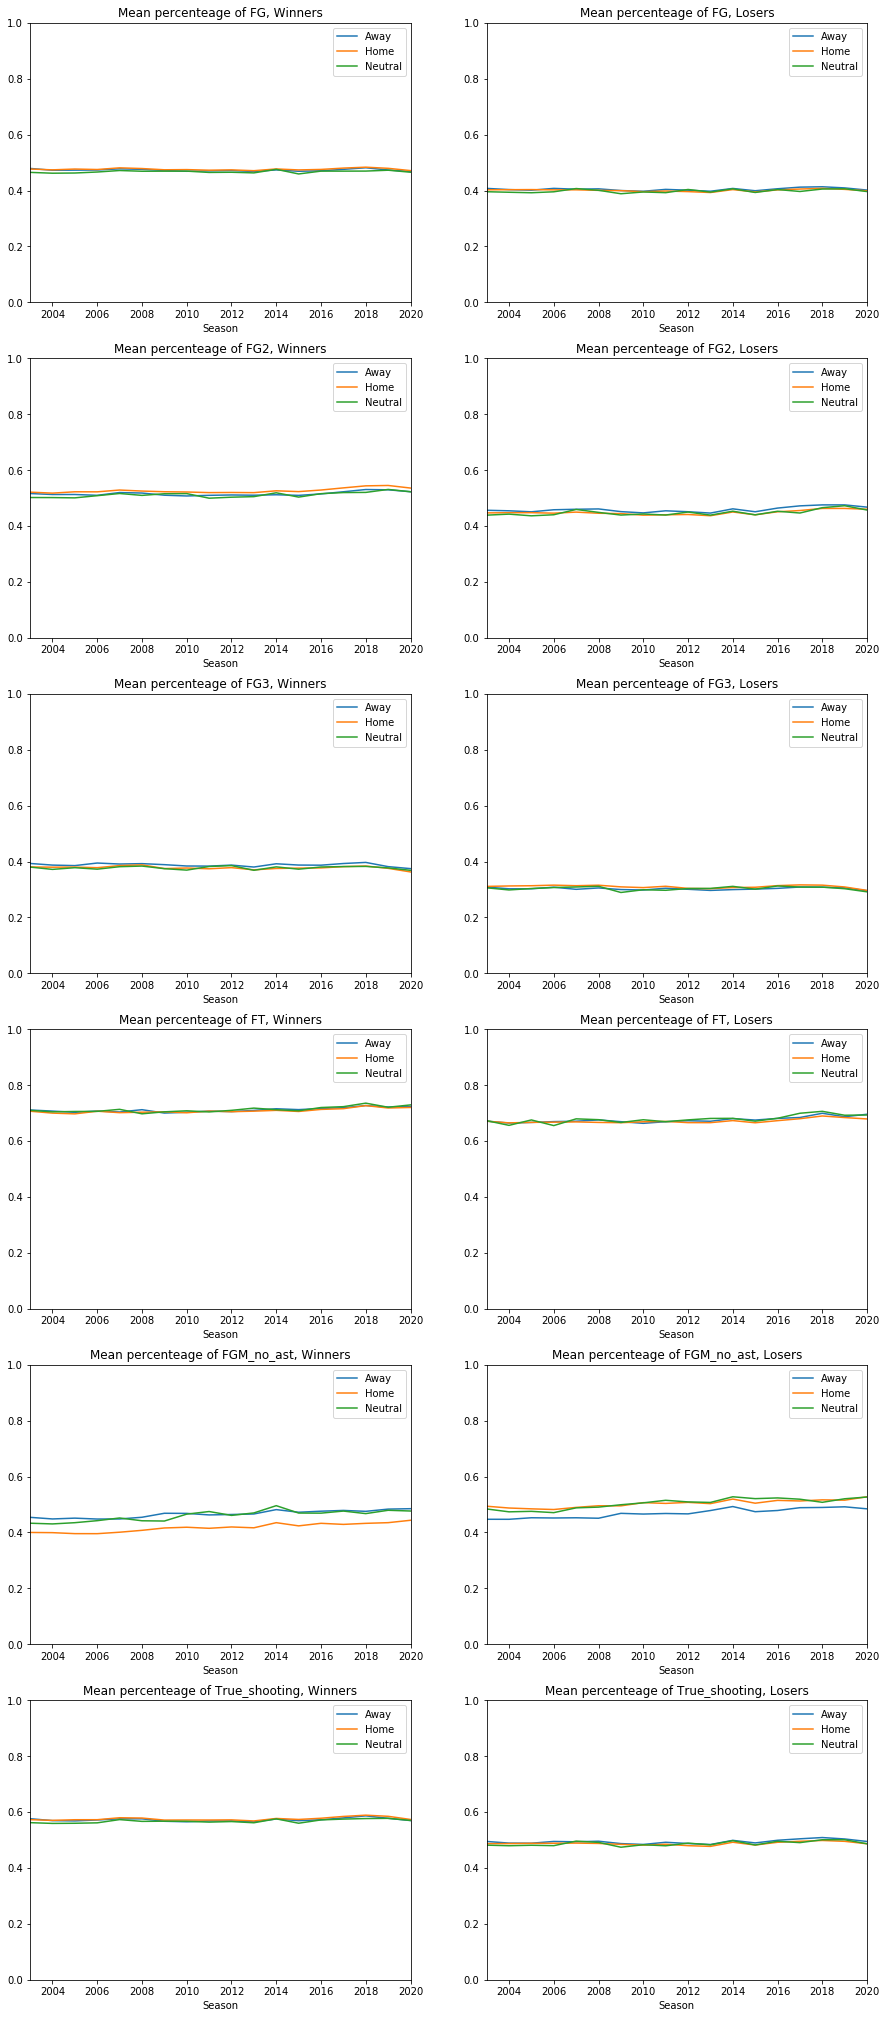

In [52]:
fig, ax= plt.subplots(6,2, figsize=(15, 6*6))

i = 0

for col in [c for c in summaries.columns if '_perc_mean' in c and c.startswith('W')]:
    name = col.split('_perc_')[0][1:]
    summaries[col].unstack().plot(title='Mean percenteage of '+name+', Winners',ax=ax[i][0])
    summaries['L'+name+'_perc_mean'].unstack().plot(title='Mean percenteage of '+name+', Losers',ax=ax[i][1])
    ax[i][0].legend(labels=['Away', 'Home', 'Neutral'])
    ax[i][1].legend(labels=['Away', 'Home', 'Neutral'])
    ax[i][0].set_ylim(0,1)
    ax[i][1].set_ylim(0,1)
    i += 1

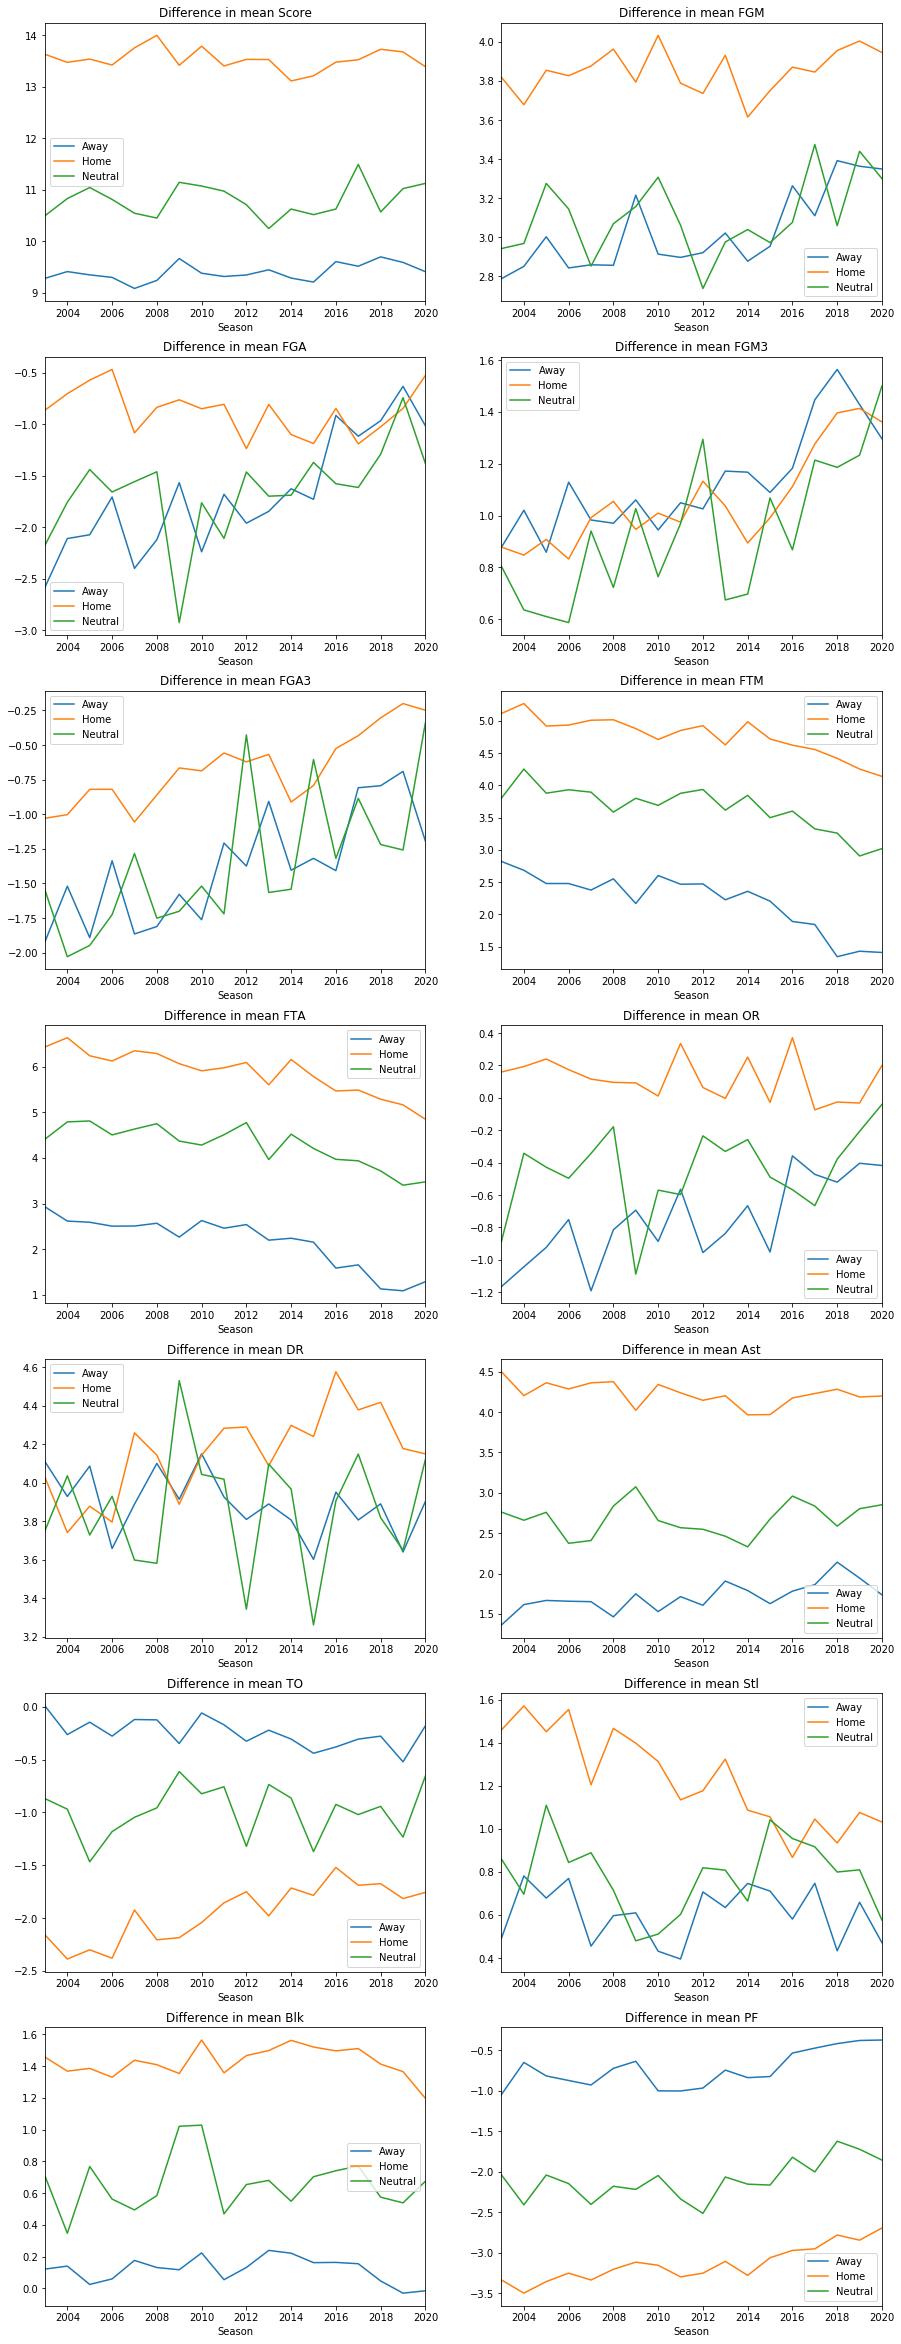

In [54]:
fig, ax= plt.subplots(7,2, figsize=(15, 6*7))

i, j = 0, 0

for col in stats:
    name = col[1:]
    summaries[[c for c in summaries.columns if name+'_diff_mean' in c]].unstack().plot(title='Difference in mean '+name,ax=ax[i][j])
    ax[i][j].legend(labels=['Away', 'Home', 'Neutral'])
    if j == 0:
        j = 1
    else:
        j = 0
        i += 1

In [55]:
playoff = pd.read_csv('data/raw_men/MDataFiles_Stage2/MNCAATourneyDetailedResults.csv')

playoff= process_details(playoff)

playoff.head()

Season  DayNum  WTeamID  WScore  LTeamID  LScore WLoc  NumOT  WFGM  WFGA  \
0    2003     134     1421      92     1411      84    N      1    32    69   
1    2003     136     1112      80     1436      51    N      0    31    66   
2    2003     136     1113      84     1272      71    N      0    31    59   
3    2003     136     1141      79     1166      73    N      0    29    53   
4    2003     136     1143      76     1301      74    N      1    27    64   

   WFGM3  WFGA3  WFTM  WFTA  WOR  WDR  WAst  WTO  WStl  WBlk  WPF  LFGM  LFGA  \
0     11     29    17    26   14   30    17   12     5     3   22    29    67   
1      7     23    11    14   11   36    22   16    10     7    8    20    64   
2      6     14    16    22   10   27    18    9     7     4   19    25    69   
3      3      7    18    25   11   20    15   18    13     1   19    27    60   
4      7     20    15    23   18   20    17   13     8     2   14    25    56   

   LFGM3  LFGA3  LFTM  LFTA  LOR  LDR  LAst  LTO  LStl  LBlk  LPF  WOT_win  \
0     12     31    14    31   17   28    16   15     5     0   22        1   
1      4     16     7     7    8   26    12   17    10     3   15        0   
2      7     28    14    21   20   22    11   12     2     5   18        0   
3      7     17    12    17   14   17    20   21     6     6   21        0   
4      9     21    15    20   10   26    16   14     5     8   19        1   

   WAway  WFG_perc  WFGM2  WFGA2  WFG2_perc  WFG3_perc  WFT_perc  WTot_Reb  \
0      1  0.463768     21     40   0.525000   0.379310  0.653846        44   
1      1  0.469697     24     43   0.558140   0.304348  0.785714        47   
2      1  0.525424     25     45   0.555556   0.428571  0.727273        37   
3      1  0.547170     26     46   0.565217   0.428571  0.720000        31   
4      1  0.421875     20     44   0.454545   0.350000  0.652174        38   

   WFGM_no_ast  WFGM_no_ast_perc  Wpossessions  Woff_rating  \
0           15          0.468750        79.350   115.942029   
1            9          0.290323        77.650   103.026401   
2           13          0.419355        68.450   122.717312   
3           14          0.482759        71.875   109.913043   
4           10          0.370370        69.925   108.687880   

   Wshtg_opportunity  WTO_perposs  WTrue_shooting_perc  LFG_perc  LFGM2  \
0           1.025205     0.151229             0.565458  0.432836     17   
1           0.935608     0.206053             0.550585  0.312500     16   
2           1.014609     0.131483             0.604752  0.362319     18   
3           0.902609     0.250435             0.608863  0.450000     20   
4           1.071505     0.185913             0.507174  0.446429     16   

   LFGA2  LFG2_perc  LFG3_perc  LFT_perc  LTot_Reb  LFGM_no_ast  \
0     36   0.472222   0.387097  0.451613        45           13   
1     48   0.333333   0.250000  1.000000        34            8   
2     41   0.439024   0.250000  0.666667        42           14   
3     43   0.465116   0.411765  0.705882        31            7   
4     35   0.457143   0.428571  0.750000        36            9   

   LFGM_no_ast_perc  Lpossessions  Loff_rating  Lshtg_opportunity  \
0          0.448276        79.725   105.362183           1.025086   
1          0.400000        76.325    66.819522           0.882083   
2          0.560000        70.975   100.035224           1.112716   
3          0.259259        75.075    97.236097           0.906760   
4          0.360000        69.500   106.474820           0.942446   

   LTO_perposs  LTrue_shooting_perc  Wdef_rating  Ldef_rating  \
0     0.188147             0.513919   105.362183   115.942029   
1     0.222732             0.378760    66.819522   103.026401   
2     0.169074             0.449509   100.035224   122.717312   
3     0.279720             0.536173    97.236097   109.913043   
4     0.201439             0.564885   106.474820   108.687880   

   Wopp_shtg_opportunity  Lopp_shtg_opportunity  Wopp_possession

In [56]:
not_sum = ['WTeamID', 'DayNum', 'LTeamID']
to_sum = [col for col in playoff.columns if col not in not_sum]

summaries = playoff[to_sum].groupby(['Season']).agg(['min', 'max', 'mean', 'median', 'count'])

summaries.columns = ['_'.join(col).strip() for col in summaries.columns.values]
summaries

WScore_min  WScore_max  WScore_mean  WScore_median  WScore_count  \
Season                                                                     
2003            47         108    76.562500           77.0            64   
2004            53         102    75.500000           75.5            64   
2005            55         111    75.562500           75.0            64   
2006            50          98    73.203125           73.0            64   
2007            54         121    75.703125           76.0            64   
2008            51         113    77.218750           75.5            64   
2009            58         103    77.250000           77.0            64   
2010            51         101    74.031250           73.0            64   
2011            53         102    73.194030           72.0            67   
2012            57         102    71.402985           71.0            67   
2013            54          95    72.208955           73.0            67   
2014            55          93    73.850746           75.0            67   
2015            56          94    72.925373           72.0            67   
2016            47         105    78.343284           78.0            67   
2017            60         103    79.432836           78.0            67   
2018            50         102    76.253731           76.0            67   
2019            53          99    76.358209           77.0            67   

        LScore_min  LScore_max  LScore_mean  LScore_median  LScore_count  \
Season                                                                     
2003            46          95    65.546875           64.0            64   
2004            43         100    64.265625           64.0            64   
2005            46         105    65.375000           64.0            64   
2006            44          92    63.171875           61.0            64   
2007            42          86    63.578125           63.5            64   
2008            29          99    63.281250           63.0            64   
2009            43          91    64.343750           64.0            64   
2010            44          96    63.328125           63.0            64   
2011            41          87    61.910448           62.0            67   
2012            41          90    61.522388           61.0            67   
2013            34          85    59.343284           58.0            67   
2014            35          85    62.925373           64.0            67   
2015            39          90    62.626866           63.0            67   
2016            43          88    65.358209           66.0            67   
2017            39          91    68.552239           70.0            67   
2018            43          84    64.925373           64.0            67   
2019            44          94    63.880597           63.0            67   

        NumOT_min  NumOT_max  NumOT_mean  NumOT_median  NumOT_count  WFGM_min  \
Season                                                                          
2003            0          2    0.093750             0           64        17   
2004            0          2    0.046875             0           64        13   
2005            0          2    0.109375             0           64        15   
2006            0          2    0.109375             0           64        14   
2007            0          2    0.093750             0           64        15   
2008            0          1    0.093750             0           64        19   
2009            0          2    0.046875             0           64        17   
2010            0          2    0.109375             0           64        15   
2011            0          2    0.089552             0           67        18   
2012            0          1    0.014925             0           67        17   
2013            0          1    0.014925             0           67        16   
2014            0          1    0.104478             0           

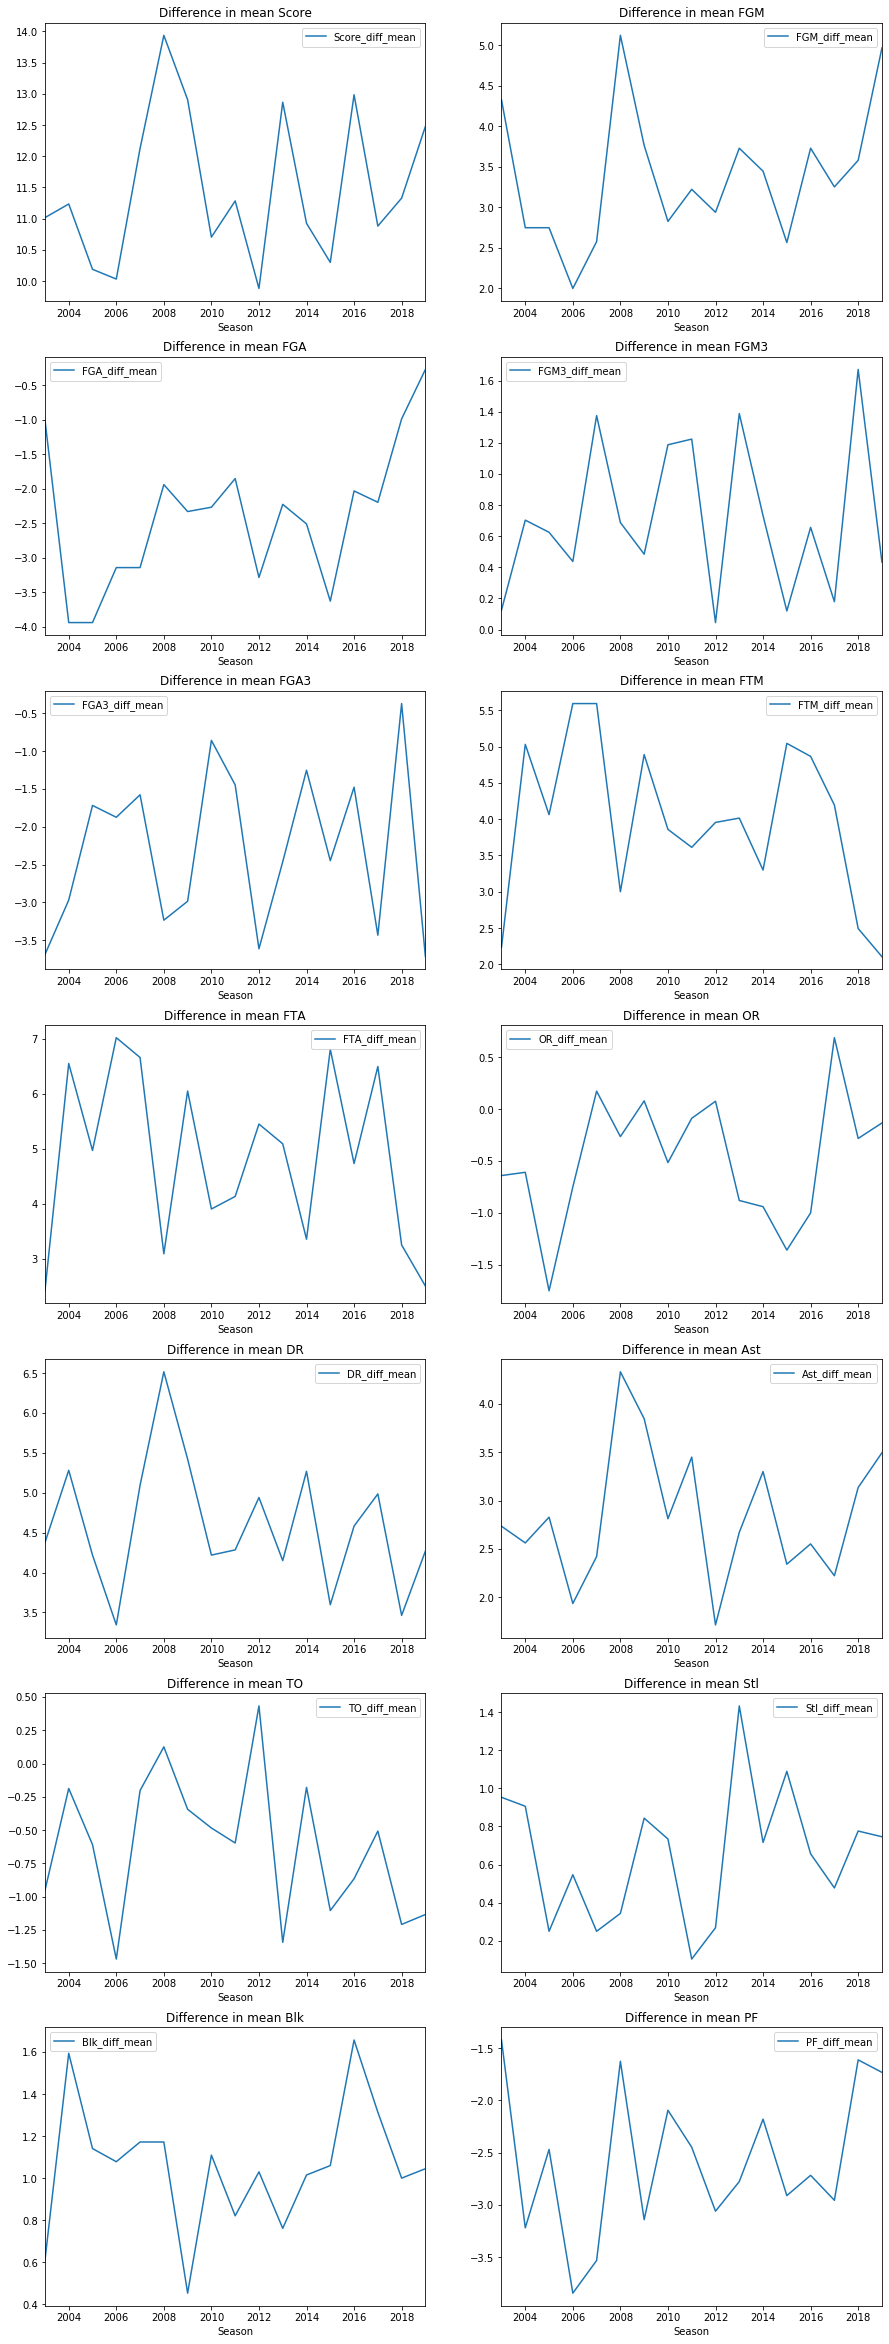

In [57]:
fig, ax= plt.subplots(7,2, figsize=(15, 6*7))

i, j = 0, 0

for col in stats:
    name = col[1:]
    summaries[[c for c in summaries.columns if name+'_diff_mean' in c]].plot(title='Difference in mean '+name,ax=ax[i][j])
    if j == 0:
        j = 1
    else:
        j = 0
        i += 1

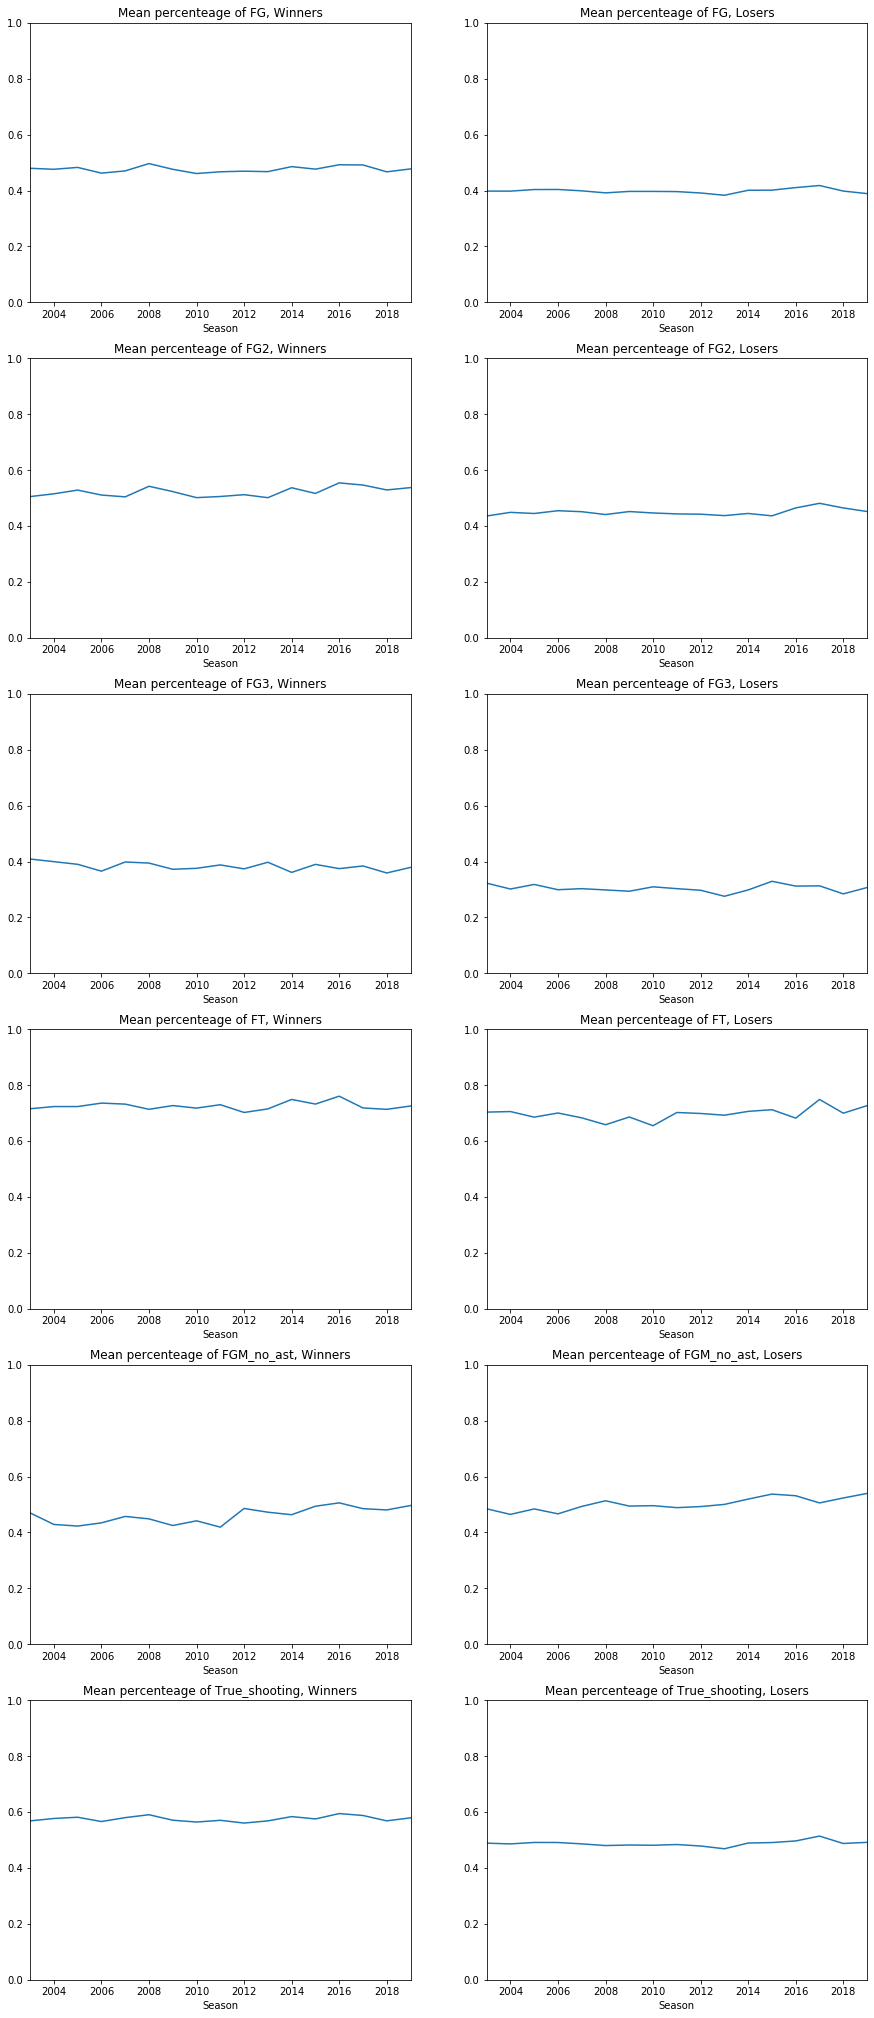

In [59]:
fig, ax= plt.subplots(6,2, figsize=(15, 6*6))

i = 0

for col in [c for c in summaries.columns if '_perc_mean' in c and c.startswith('W')]:
    name = col.split('_perc_')[0][1:]
    summaries[col].plot(title='Mean percenteage of '+name+', Winners',ax=ax[i][0])
    summaries['L'+name+'_perc_mean'].plot(title='Mean percenteage of '+name+', Losers',ax=ax[i][1])
    ax[i][0].set_ylim(0,1)
    ax[i][1].set_ylim(0,1)
    i += 1

# Seeds

In [60]:
[col for col in men_comp if 'Seed' in col]

['data/raw_men/MDataFiles_Stage2/MNCAATourneySeeds.csv',
 'data/raw_men/MDataFiles_Stage2/MNCAATourneySeedRoundSlots.csv',
 'data/raw_men/MDataFiles_Stage1/MNCAATourneySeeds.csv',
 'data/raw_men/MDataFiles_Stage1/MNCAATourneySeedRoundSlots.csv']

In [61]:
seeds = pd.read_csv('data/raw_men/MDataFiles_Stage2/MNCAATourneySeeds.csv')
seeds.head()

Season Seed  TeamID
0    1985  W01    1207
1    1985  W02    1210
2    1985  W03    1228
3    1985  W04    1260
4    1985  W05    1374

In [62]:
slots = pd.read_csv('data/raw_men/MDataFiles_Stage2/MNCAATourneySeedRoundSlots.csv')
slots.head()

Seed  GameRound GameSlot  EarlyDayNum  LateDayNum
0  W01          1     R1W1          136         137
1  W01          2     R2W1          138         139
2  W01          3     R3W1          143         144
3  W01          4     R4W1          145         146
4  W01          5     R5WX          152         152

# Rankings

In [63]:
[col for col in men_comp if 'Mass' in col]

['data/raw_men/MDataFiles_Stage2/MMasseyOrdinals.csv',
 'data/raw_men/MDataFiles_Stage1/MMasseyOrdinals.csv']

In [64]:
massey = pd.read_csv('data/raw_men/MDataFiles_Stage2/MMasseyOrdinals.csv')
massey.head()

Season  RankingDayNum SystemName  TeamID  OrdinalRank
0    2003             35        SEL    1102          159
1    2003             35        SEL    1103          229
2    2003             35        SEL    1104           12
3    2003             35        SEL    1105          314
4    2003             35        SEL    1106          260

In [65]:
print(massey.SystemName.nunique())

179


In [66]:
tmp = massey[['Season', 'RankingDayNum', 'TeamID',
              'OrdinalRank']].groupby(['Season', 'TeamID',
                                       'RankingDayNum']).agg(['mean', 'max', 'min'])
tmp.columns = ['_'.join(col).strip() for col in tmp.columns.values]
tmp = tmp.reset_index()
tmp.head()

Season  TeamID  RankingDayNum  OrdinalRank_mean  OrdinalRank_max  \
0    2003    1102             35        159.000000              159   
1    2003    1102             37        118.000000              219   
2    2003    1102             42        191.000000              191   
3    2003    1102             43        108.000000              108   
4    2003    1102             44         88.866667              153   

   OrdinalRank_min  
0              159  
1               90  
2              191  
3              108  
4               52

In [67]:
tmp[tmp.OrdinalRank_mean != tmp.OrdinalRank_min]

Season  TeamID  RankingDayNum  OrdinalRank_mean  OrdinalRank_max  \
1         2003    1102             37        118.000000              219   
4         2003    1102             44         88.866667              153   
6         2003    1102             51        133.052632              199   
7         2003    1102             56        177.500000              184   
8         2003    1102             57        148.470588              197   
...        ...     ...            ...               ...              ...   
230815    2020    1467            100        208.964286              284   
230816    2020    1467            107        200.224138              277   
230817    2020    1467            114        210.741379              279   
230818    2020    1467            121        212.677966              281   
230819    2020    1467            128        212.000000              282   

        OrdinalRank_min  
1                    90  
4                    52  
6                    52  
7                   173  
8                   116  
...                 ...  
230815              155  
230816              124  
230817              140  
230818              149  
230819              139  

[200329 rows x 6 columns]

In [68]:
massey.RankingDayNum.max()

133

In [69]:
massey.TeamID.value_counts().head()

1115    13475
1181    12919
1242    12878
1314    12727
1247    12714
Name: TeamID, dtype: int64

# play by play

In [70]:
[col for col in men_comp if 'Events' in col]

['data/raw_men/MEvents2019.csv',
 'data/raw_men/MEvents2018.csv',
 'data/raw_men/MEvents2020.csv',
 'data/raw_men/MEvents2017.csv',
 'data/raw_men/MEvents2015.csv',
 'data/raw_men/MEvents2016.csv']

In [71]:
pbp_event = pd.read_csv('data/raw_men/MEvents2020.csv')
pbp_event.head()

EventID  Season  DayNum  WTeamID  LTeamID  WFinalScore  LFinalScore  \
0  13154595    2020       1     1114     1283           67           66   
1  13154596    2020       1     1114     1283           67           66   
2  13154597    2020       1     1114     1283           67           66   
3  13154598    2020       1     1114     1283           67           66   
4  13154599    2020       1     1114     1283           67           66   

   WCurrentScore  LCurrentScore  ElapsedSeconds  EventTeamID  EventPlayerID  \
0              0              0              17         1114            560   
1              0              0              17         1114            560   
2              0              2              32         1283           7770   
3              0              2              32         1283           7801   
4              2              2              53         1114            570   

  EventType EventSubType  X  Y  Area  
0      foul          unk  0  0     0  
1  turnover          unk  0  0     0  
2     made2         jump  0  0     0  
3    assist          NaN  0  0     0  
4     made2         jump  0  0     0

In [67]:
#pbp_play = pd.read_csv('data/raw_men/MPlayers.csv')
#pbp_play.head()

# Putting things together

In [72]:
reg_season.head()

Season  DayNum  WTeamID  WScore  LTeamID  LScore WLoc  NumOT  WFGM  WFGA  \
0    2003      10     1104      68     1328      62    N      0    27    58   
1    2003      10     1272      70     1393      63    N      0    26    62   
2    2003      11     1266      73     1437      61    N      0    24    58   
3    2003      11     1296      56     1457      50    N      0    18    38   
4    2003      11     1400      77     1208      71    N      0    30    61   

   WFGM3  WFGA3  WFTM  WFTA  WOR  WDR  WAst  WTO  WStl  WBlk  WPF  LFGM  LFGA  \
0      3     14    11    18   14   24    13   23     7     1   22    22    53   
1      8     20    10    19   15   28    16   13     4     4   18    24    67   
2      8     18    17    29   17   26    15   10     5     2   25    22    73   
3      3      9    17    31    6   19    11   12    14     2   18    18    49   
4      6     14    11    13   17   22    12   14     4     4   20    24    62   

   LFGM3  LFGA3  LFTM  LFTA  LOR  LDR  LAst  LTO  LStl  LBlk  LPF  WOT_win  \
0      2     10    16    22   10   22     8   18     9     2   20        0   
1      6     24     9    20   20   25     7   12     8     6   16        0   
2      3     26    14    23   31   22     9   12     2     5   23        0   
3      6     22     8    15   17   20     9   19     4     3   23        0   
4      6     16    17    27   21   15    12   10     7     1   14        0   

   WAway  WFG_perc  WFGM2  WFGA2  WFG2_perc  WFG3_perc  WFT_perc  WTot_Reb  \
0      1  0.465517     24     44   0.545455   0.214286  0.611111        38   
1      1  0.419355     18     42   0.428571   0.400000  0.526316        43   
2      1  0.413793     16     40   0.400000   0.444444  0.586207        43   
3      1  0.473684     15     29   0.517241   0.333333  0.548387        25   
4      1  0.491803     24     47   0.510638   0.428571  0.846154        39   

   WFGM_no_ast  WFGM_no_ast_perc  Wpossessions  Woff_rating  \
0           14          0.518519        75.550    90.006618   
1           10          0.384615        69.025   101.412532   
2            9          0.375000        64.775   112.697800   
3            7          0.388889        58.725    95.359728   
4           18          0.600000        64.175   119.984418   

   Wshtg_opportunity  WTO_perposs  WTrue_shooting_perc  LFG_perc  LFGM2  \
0           0.880874     0.304434             0.510894  0.415094     20   
1           1.028975     0.188338             0.492784  0.358209     18   
2           1.108066     0.154381             0.508534  0.301370     19   
3           0.897829     0.204342             0.531057  0.367347     12   
4           1.046747     0.218153             0.573130  0.387097     18   

   LFGA2  LFG2_perc  LFG3_perc  LFT_perc  LTot_Reb  LFGM_no_ast  \
0     43   0.465116   0.200000  0.727273        32           14   
1     43   0.418605   0.250000  0.450000        45           17   
2     47   0.404255   0.115385  0.608696        53           13   
3     27   0.444444   0.272727  0.533333        37            9   
4     46   0.391304   0.375000  0.629630        36           12   

   LFGM_no_ast_perc  Lpossessions  Loff_rating  Lshtg_opportunity  \
0          0.636364        71.450    86.773968           0.888034   
1          0.708333        68.500    91.970803           1.116788   
2          0.590909        64.925    93.954563           1.292645   
3          0.500000        58.125    86.021505           0.965591   
4          0.500000        63.825   111.241676           1.172346   

   LTO_perposs  LTrue_shooting_perc  Wdef_rating  Ldef_rating  \
0     0.251924             0.488574    86.773968    90.006618   
1     0.175182             0.411765    91.970803   101.412532   
2     0.184829             0.363420    93.954563   112.697800   
3     0.326882             0.445434    86.021505    95.359728   
4     0.156678             0.474440   111.241676   119.984418   

   Wopp_shtg_opportunity  Lopp_shtg_opportunity  Wopp_possession

In [73]:
reg_s = full_stats(reg_season)
reg_s.head()

Season  TeamID        Ast  Ast_advantage  Ast_diff      Away       Blk  \
0    2003    1102  13.000000       0.714286  3.857143  0.107143  1.785714   
1    2003    1103  15.222222       0.444444 -0.259259  0.148148  2.333333   
2    2003    1104  12.107143       0.535714  0.428571  0.142857  3.785714   
3    2003    1105  14.538462       0.500000 -1.269231  0.076923  2.076923   
4    2003    1106  11.678571       0.500000 -0.107143  0.178571  3.142857   

   Blk_advantage  Blk_diff         DR  DR_advantage   DR_diff  DR_opportunity  \
0       0.607143  0.214286  16.821429      0.357143 -3.321429        0.729546   
1       0.481481 -0.518519  19.925926      0.444444 -2.111111        0.684811   
2       0.500000  0.607143  23.928571      0.500000  1.285714        0.745133   
3       0.230769 -2.115385  23.115385      0.423077 -3.269231        0.728313   
4       0.500000 -0.035714  23.857143      0.535714  1.500000        0.758479   

   DR_opportunity_advantage  DR_opportunity_diff        FGA       FGA2  \
0                  0.142857            -0.269979  39.785714  18.964286   
1                  0.222222            -0.091868  55.851852  39.777778   
2                  0.607143             0.052238  57.178571  37.321429   
3                  0.500000             0.015613  61.615385  40.846154   
4                  0.571429             0.049761  55.285714  37.642857   

   FGA2_advantage  FGA2_diff       FGA3  FGA3_advantage  FGA3_diff  \
0        0.107143 -11.035714  20.821429        0.821429   8.392857   
1        0.481481   1.148148  16.074074        0.333333  -2.296296   
2        0.571429   0.964286  19.857143        0.571429   0.714286   
3        0.538462  -0.576923  20.769231        0.807692   3.230769   
4        0.500000  -0.535714  17.642857        0.642857   2.428571   

   FGA_advantage  FGA_diff        FGM       FGM2  FGM2_advantage  FGM2_diff  \
0       0.392857 -2.642857  19.142857  11.321429        0.321429  -3.214286   
1       0.333333 -1.148148  27.148148  21.703704        0.518519   0.592593   
2       0.607143  1.678571  24.035714  17.678571        0.535714   0.785714   
3       0.615385  2.653846  24.384615  16.807692        0.230769  -3.923077   
4       0.535714  1.892857  23.428571  17.321429        0.500000   0.392857   

       FGM3  FGM3_advantage  FGM3_diff  FGM_advantage  FGM_diff  FGM_no_ast  \
0  7.821429        0.642857   3.071429       0.535714 -0.142857    6.142857   
1  5.444444        0.370370  -1.222222       0.296296 -0.629630   11.925926   
2  6.357143        0.464286   0.000000       0.535714  0.785714   11.928571   
3  7.576923        0.653846   1.307692       0.230769 -2.615385    9.846154   
4  6.107143        0.678571   1.321429       0.678571  1.714286   11.750000   

   FGM_no_ast_advantage  FGM_no_ast_diff        FTA  FTA_advantage  FTA_diff  \
0              0.142857        -4.000000  17.107143       0.392857 -2.142857   
1              0.481481        -0.370370  25.851852       0.555556  3.703704   
2              0.535714         0.357143  20.928571       0.607143  3.785714   
3              0.423077        -1.346154  21.846154       0.384615 -2.653846   
4              0.678571         1.821429  16.464286       0.178571 -5.500000   

         FTM  FTM_advantage  FTM_diff    N_wins         OR  OR_advantage  \
0  11.142857       0.285714 -2.535714  0.428571   4.178571      0.071429   
1  19.037037       0.666667  3.111111  0.481481   9.777778      0.296296   
2  14.857143       0.714286  2.714286  0.607143  13.571429      0.714286   
3  15.423077       0.461538 -0.961538  0.269231  13.500000      0.500000   
4  10.642857       0.142857 -4.892857  0.464286  12.285714      0.535714   

    OR_diff  OR_opportunity  OR_opportunity_advantage  OR_opportunity_diff  \
0 -5.428571        0.199280                  0.107143            -0.220372   
1 -2.259259        0.338522                  0.407407            -0.071823   
2  2.678571        0.406872                  0.785714            

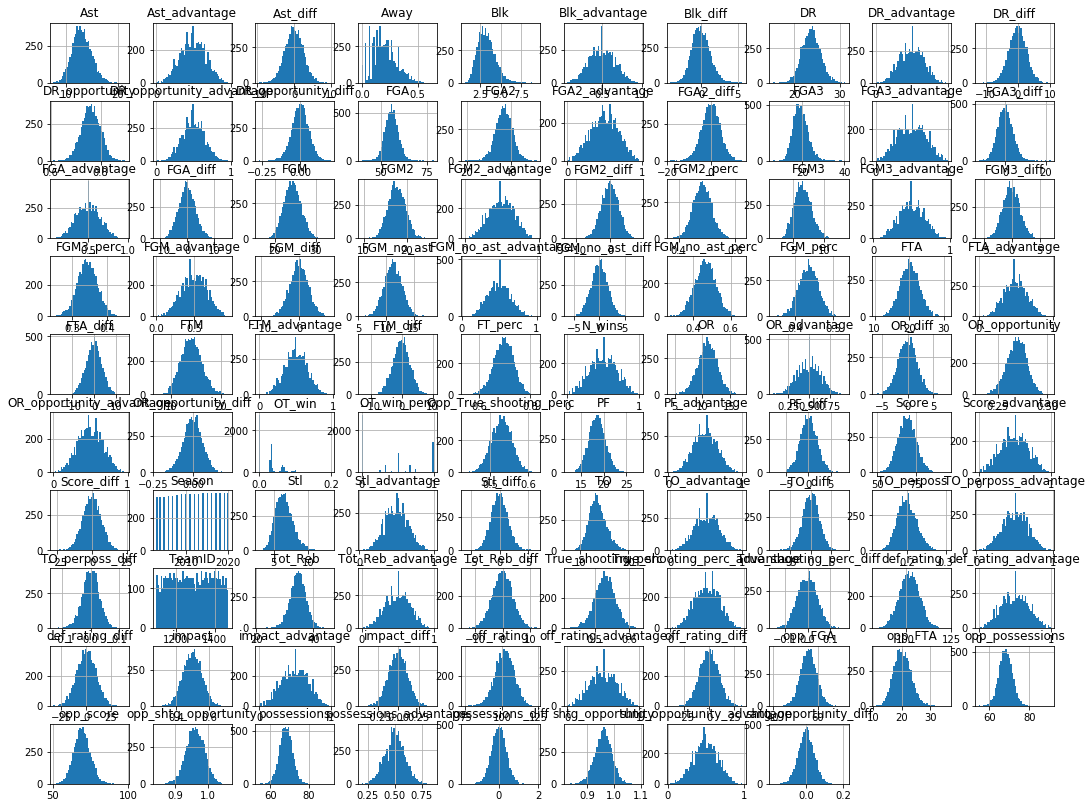

In [74]:
reg_s.hist(bins=50, figsize=(18, 14))
plt.show()

In [76]:
summary_reg = reg_s.groupby('Season')[[col for col in reg_s if col not in ['TeamID', 'Season']]].agg(['mean', 'max', 'min'])
summary_reg.columns = ['_'.join(col).strip() for col in summary_reg.columns.values]
summary_reg

Ast_mean    Ast_max   Ast_min  Ast_advantage_mean  Ast_advantage_max  \
Season                                                                          
2003    13.552585  18.892857  9.115385            0.497202           0.966667   
2004    13.484355  18.896552  8.000000            0.497057           0.900000   
2005    13.443881  19.354839  7.642857            0.496154           0.903226   
2006    13.458402  17.965517  8.481481            0.495861           0.903226   
2007    13.327296  18.724138  8.724138            0.496458           0.875000   
2008    13.212550  18.935484  8.343750            0.494985           0.911765   
2009    12.927176  18.294118  8.870968            0.496744           0.878788   
2010    12.810519  19.642857  8.677419            0.496023           0.937500   
2011    12.792470  17.882353  8.642857            0.496406           0.900000   
2012    12.688739  19.343750  8.133333            0.496599           0.935484   
2013    12.597379  17.727273  8.068966            0.496684           0.888889   
2014    12.503598  18.545455  7.612903            0.496562           0.903226   
2015    12.361373  17.742857  7.518519            0.496778           0.909091   
2016    13.198083  20.558824  8.033333            0.496761           0.941176   
2017    13.298661  21.484848  8.968750            0.496930           0.939394   
2018    13.425570  19.333333  8.800000            0.496392           0.906250   
2019    13.151698  19.600000  9.354839            0.496859           0.966667   
2020    12.792752  17.843750  8.103448            0.498243           0.903226   

        Ast_advantage_min  Ast_diff_mean  Ast_diff_max  Ast_diff_min  \
Season                                                                 
2003             0.040000      -0.052070      7.233333     -8.200000   
2004             0.107143      -0.047083      6.166667     -7.178571   
2005             0.000000      -0.060888      7.032258     -9.500000   
2006             0.037037      -0.068230      5.696970     -9.370370   
2007             0.103448      -0.062522      6.838710     -6.100000   
2008             0.000000      -0.084815      7.030303     -8.700000   
2009             0.068966      -0.059245      6.500000     -6.965517   
2010             0.000000      -0.072266      6.766667     -9.580645   
2011             0.038462      -0.060864      6.676471     -8.000000   
2012             0.071429      -0.061778      7.096774     -6.928571   
2013             0.034483      -0.056042      7.666667     -7.379310   
2014             0.111111      -0.057719      6.451613     -6.296296   
2015             0.093750      -0.055148      7.233333     -7.444444   
2016             0.074074      -0.054422      9.941176     -6.965517   
2017             0.103448      -0.052160      8.484848     -8.103448   
2018             0.033333      -0.063498      7.750000     -8.233333   
2019             0.032258      -0.050929      8.393939     -8.935484   
2020             0.032258      -0.030401      6.548387     -8.866667   

        Away_mean  Away_max  Away_min  Blk_mean   Blk_max   Blk_min  \
Season                                                                
2003     0.193011  0.551724       0.0  3.244834  7.733333  0.655172   
2004     0.196410  0.642857       0.0  3.174389  8.727273  0.777778   
2005     0.192483  0.515152       0.0  3.252970  9.137931  1.000000   
2006     0.195876  0.533333       0.0  3.253196  9.333333  1.038462   
2007     0.193596  0.516129       0.0  3.229921  8.580645  0.777778   
2008     0.197546  0.529412       0.0  3.285406  8.781250  0.862069   
2009     0.198742  0.500000       0.0  3.234054  8.000000  0.896552   
2010     0.199946  0.551724       0.0  3.421506  7.750000  0.961538   
2011     0.201519  0.562500       0.0  3.378536  7.068966  1.064516   
2012     0.200470  0.571429       0.0  3.355762  8.794118  1.000000   
2013     0.203051  0.500000       0.0  3.414768  7.419355  1.000000   
2014     0.207102  0.517

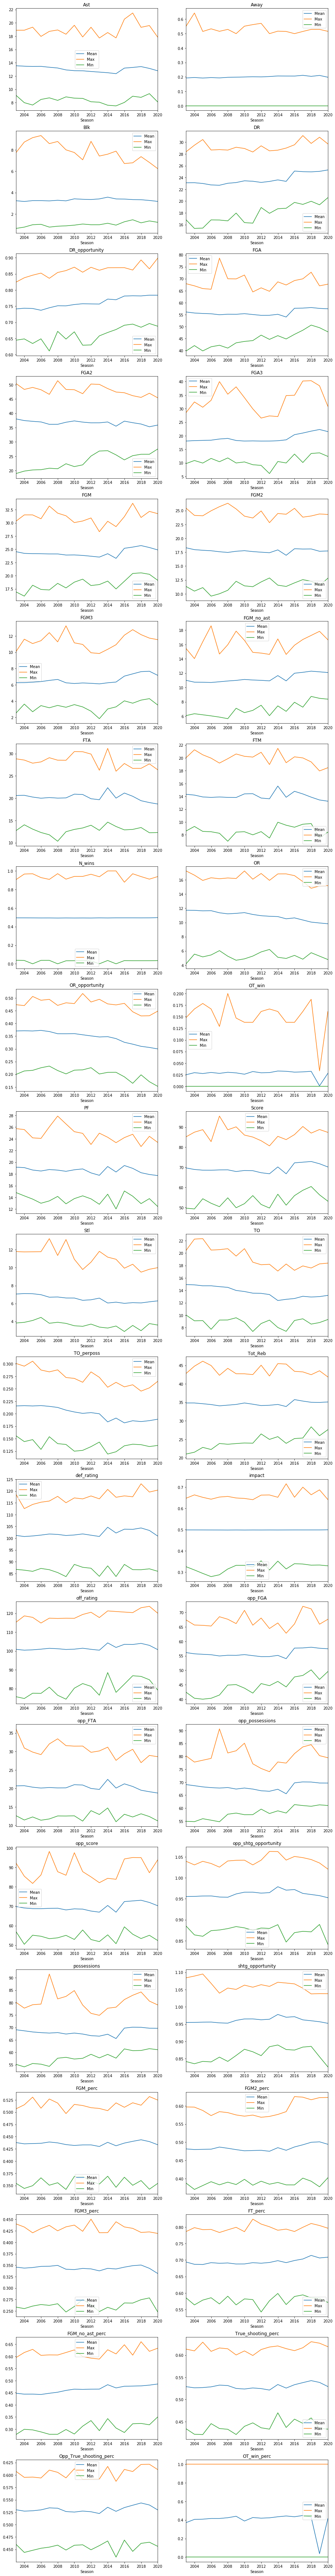

In [80]:
stats = [col.split('_mean')[0] for col in summary_reg if '_mean' in col and 'diff_' not in col and 'advantage' not in col]

fig, ax= plt.subplots(int(np.ceil(len(stats)/2)),2, figsize=(15, 6*int(np.ceil(len(stats)/2))))

i, j = 0, 0

for col in stats:
    summary_reg[[col+'_mean', col+'_max', col+'_min']].plot(title=col,ax=ax[i][j])
    ax[i][j].legend(labels=['Mean', 'Max', 'Min'])
    if j == 0:
        j = 1
    else:
        j = 0
        i += 1

plt.show()

# Exploring training data (from Notebook 3)

In [81]:
df = pd.read_csv('data/processed_men/training_data.csv')

df = df[[col for col in df if 'L2W' not in col]].copy()

df.head()

Season  DayNum  Team1  Team2  target  target_points  T1_Loc  T2_Loc  \
0    2003     136   1112   1436       1             29       0       0   
1    2003     136   1113   1272       1             13       0       0   
2    2003     136   1141   1166       1              6       0       0   
3    2003     136   1143   1301       1              2       0       0   
4    2003     136   1140   1163       0             -5       0       0   

               ID     T1_Ast  T1_Ast_advantage  T1_Ast_diff   T1_Away  \
0  2003_1112_1436  17.642857          0.607143     2.178571  0.392857   
1  2003_1113_1272  15.551724          0.586207     1.482759  0.206897   
2  2003_1141_1166  15.620690          0.724138     3.827586  0.413793   
3  2003_1143_1301  16.000000          0.482759    -0.034483  0.275862   
4  2003_1140_1163  13.419355          0.612903     2.645161  0.322581   

     T1_Blk  T1_Blk_advantage  T1_Blk_diff      T1_DR  T1_DR_advantage  \
0  4.214286          0.678571     1.821429  27.642857         0.785714   
1  4.241379          0.482759     0.310345  23.310345         0.724138   
2  4.000000          0.689655     1.517241  23.275862         0.724138   
3  2.793103          0.482759     0.275862  24.379310         0.586207   
4  2.516129          0.612903     0.290323  24.419355         0.677419   

   T1_DR_diff  T1_DR_opportunity  T1_DR_opportunity_advantage  \
0    4.357143           0.724040                     0.642857   
1    2.758621           0.764390                     0.689655   
2    4.379310           0.752266                     0.655172   
3    1.379310           0.736381                     0.517241   
4    4.225806           0.810832                     0.580645   

   T1_DR_opportunity_diff     T1_FGA    T1_FGA2  T1_FGA2_advantage  \
0                0.060072  65.714286  45.642857           0.607143   
1                0.064969  56.896552  44.310345           0.724138   
2                0.023430  52.689655  34.758621           0.172414   
3               -0.006878  58.724138  41.689655           0.586207   
4                0.056233  51.258065  35.129032           0.548387   

   T1_FGA2_diff    T1_FGA3  T1_FGA3_advantage  T1_FGA3_diff  T1_FGA_advantage  \
0      0.928571  20.071429           0.392857      0.107143          0.500000   
1      4.551724  12.586207           0.206897     -3.310345          0.482759   
2     -9.275862  17.931034           0.724138      4.034483          0.310345   
3      4.344828  17.034483           0.344828     -4.413793          0.517241   
4      0.096774  16.129032           0.451613     -0.096774          0.483871   

   T1_FGA_diff     T1_FGM    T1_FGM2  T1_FGM2_advantage  T1_FGM2_diff  \
0     1.035714  30.321429  23.285714           0.714286      3.250000   
1     1.241379  27.206897  23.206897           0.724138      3.862069   
2    -5.241379  26.620690  19.793103           0.448276     -1.586207   
3    -0.068966  27.344828  20.931034           0.655172      2.655172   
4     0.000000  24.032258  17.838710           0.612903      1.870968   

    T1_FGM3  T1_FGM3_advantage  T1_FGM3_diff  T1_FGM_advantage  T1_FGM_diff  \
0  7.035714           0.500000      0.714286          0.750000     3.964286   
1  4.000000           0.241379     -1.448276          0.586207     2.413793   
2  6.827586           0.655172      1.862069          0.551724     0.275862   
3  6.413793           0.413793     -0.689655          0.655172     1.965517   
4  6.193548           0.516129      1.193548          0.645161     3.064516   

   T1_FGM_no_ast  T1_FGM_no_ast_advantage  T1_FGM_no_ast_diff     T1_FTA  \
0      12.678571                 0.571429            1.785714  25.000000   
1      11.655172                 0.482759            0.931034  26.206897   
2      11.000000                 0.275862           -3.551724  25.172414   
3      11.344828                 0.724138            2.000000  19.517241   
4      10.612903                 0.516129            0.419355  24.161290   

   T

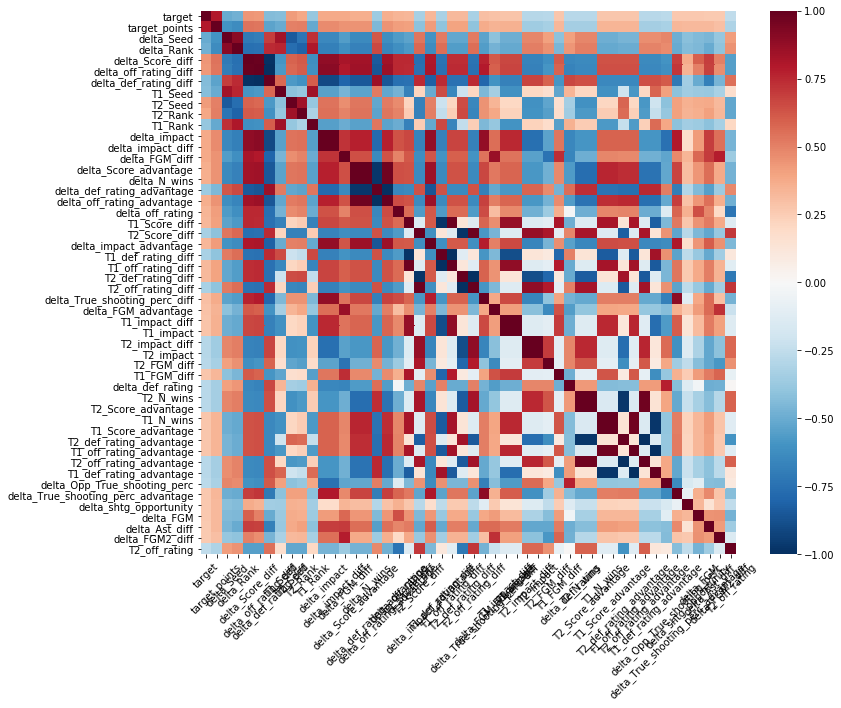

In [82]:
high_corr = exp.plot_correlations(df, target='target', limit=50)

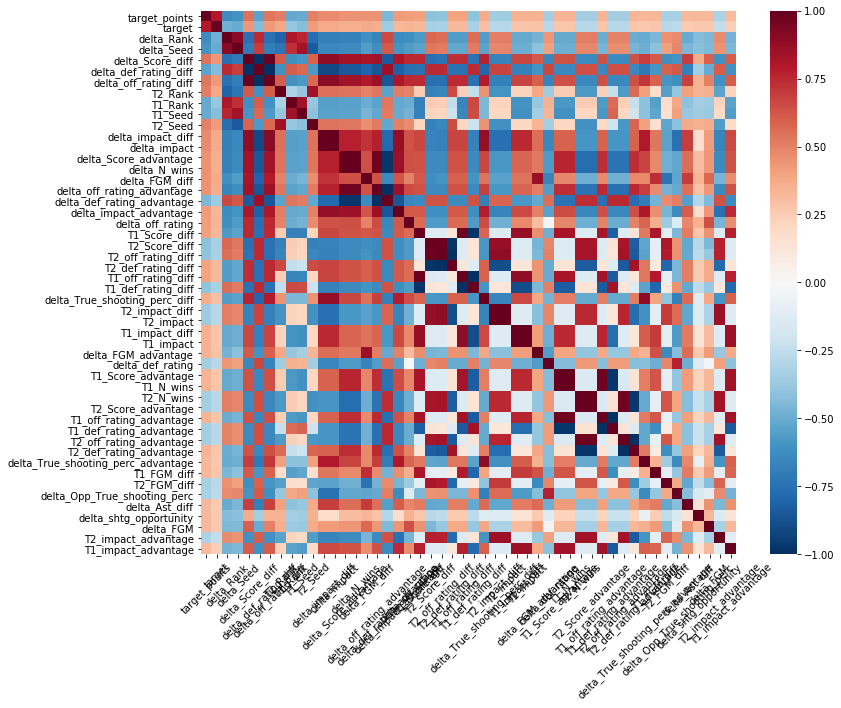

In [83]:
high_corr = exp.plot_correlations(df, target='target_points', limit=50)

                            delta_Rank  delta_Seed  delta_Score_diff  \
delta_Rank                    1.000000    0.904246         -0.757067   
delta_Seed                    0.904246    1.000000         -0.706681   
delta_Score_diff             -0.757067   -0.706681          1.000000   
delta_def_rating_diff         0.744230    0.688326         -0.985651   
delta_off_rating_diff        -0.744230   -0.688326          0.985651   
T2_Rank                      -0.810338   -0.732745          0.613480   
T1_Rank                       0.810338    0.732745         -0.613480   
T1_Seed                       0.758582    0.838911         -0.592843   
T2_Seed                      -0.758582   -0.838911          0.592843   
delta_impact_diff            -0.681862   -0.646798          0.887435   
delta_impact                 -0.681862   -0.646798          0.887435   
delta_Score_advantage        -0.672154   -0.639380          0.842458   
delta_N_wins                 -0.672154   -0.639380          0.84

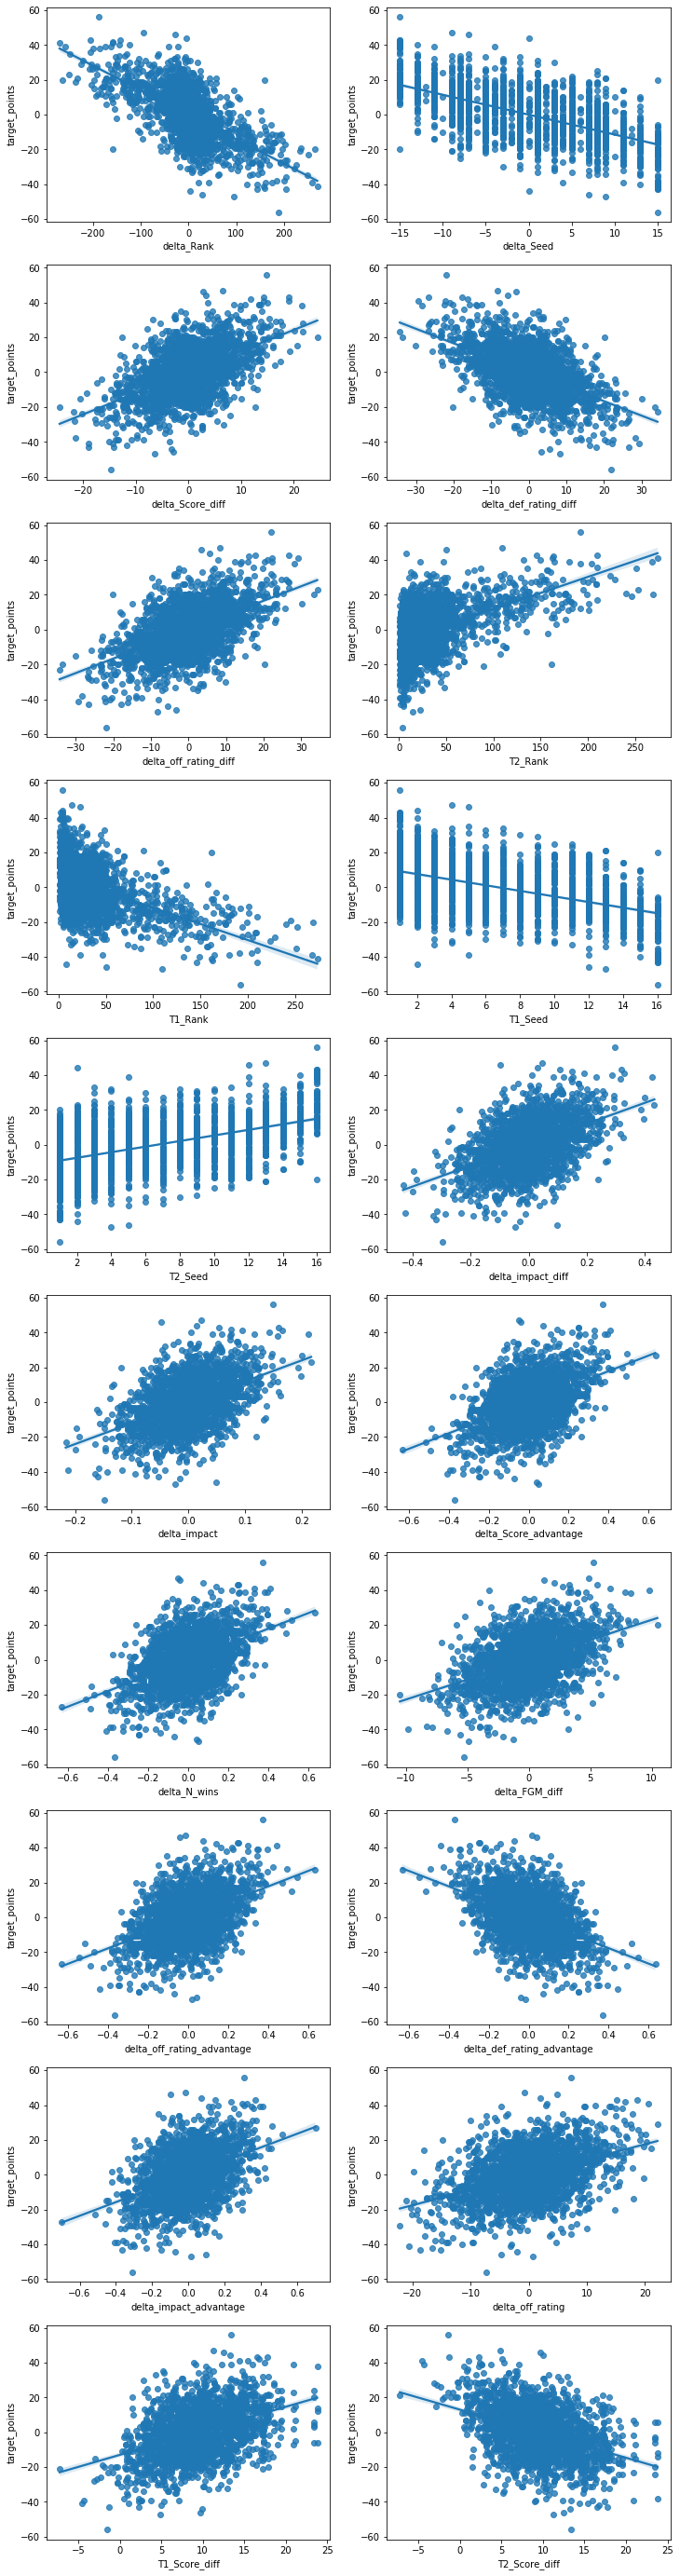

In [84]:
exp.corr_target(df, 'target_points', list(high_corr[2:22].index), x_estimator=None)

In [85]:
for col in [col for col in df if 'delta' in col]:
    df[f'sign_{col}'] = np.sign(df[col])

In [86]:
feats = []
scores = []

for col in [col for col in df if 'sign_' in col]:
    try:
        scores.append(df.groupby(col)['target'].mean()[1])
        feats.append(col)
    except KeyError:
        continue

segments = pd.DataFrame({'feat': feats, 'score': scores})
                      
segments.sort_values(by='score', ascending=False)

feat     score
53            sign_delta_Score_diff  0.669468
76       sign_delta_off_rating_diff  0.669468
71                sign_delta_impact  0.661998
73           sign_delta_impact_diff  0.661998
30              sign_delta_FGM_diff  0.656075
..                              ...       ...
69  sign_delta_def_rating_advantage  0.353670
89                 sign_delta_upset  0.353579
70       sign_delta_def_rating_diff  0.330532
98                  sign_delta_Seed  0.286389
99                  sign_delta_Rank  0.279178

[102 rows x 2 columns]